# House Prices: EDA to ML (Beginner)

## Part 0 : Imports, Settings, Functions

In [1]:
import numpy as np
import pandas as pd
#pd.set_option('max_columns', 105)
pd.options.display.max_rows = 105
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
#SciPyÎäî Í≥ºÌïô Î∞è ÏàòÌïô Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎäî Ïò§Ìîà ÏÜåÏä§ Python ÎùºÏù¥Î∏åÎü¨Î¶¨
#ScipyÏùò stats Î™®ÎìàÏùÄ ÌôïÎ•† Î∂ÑÌè¨ Î∞è ÌÜµÍ≥Ñ Ïó∞ÏÇ∞Ïóê ÏÇ¨Ïö©ÎêòÎäî Î™®ÎìàÏûÖÎãàÎã§1. Ïù¥ Î™®ÎìàÏóêÎäî ÎßéÏùÄ ÌôïÎ•† Î∂ÑÌè¨ Ìï®ÏàòÍ∞Ä 
# Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏúºÎ©∞, Ïù¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌôïÎ•† Î∂ÑÌè¨Î•º ÏÉùÏÑ±ÌïòÍ≥† Î∂ÑÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§2. ÏòàÎ•º Îì§Ïñ¥, Ïù¥ Î™®ÎìàÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ 
# Ï†ïÍ∑ú Î∂ÑÌè¨, Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨ Îì±ÏùÑ ÏÉùÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§
%matplotlib inline 
sns.set()

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category =DeprecationWarning)
warnings.filterwarnings("ignore")

# from subprocess import check_output
# print(check_output(['dir','D:/aiffel/kaggle_clone/data/house/']).decode('utf8'))



Settings and switches   

Here one can choose settings for optimal performance and runtime.   
For example, nr_cv sets the number of cross validations used in GridsearchCV, and   
min_val_corr is the minimum value for the correlation coefficient to the target (only features with larger correlation will be used).

In [2]:
# setting the number of cross validation used in the Model part
nr_cv = 5

# switch for using log values for SalePrice and features
use_logvals = 1
# target used for correlation
target='SalePrice_Log'

# only columns with correlation above this threshold value
# are used for the ML Regressors in Part 3
min_val_corr = 0.4

# switch for dropping columns that are similar to others already used and show a high correlation to these
drop_similar = 1

ÍµêÏ∞® Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨(Cross Validation)Îäî Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ï Ï§ë ÌïòÎÇòÏûÖÎãàÎã§. Îç∞Ïù¥ÌÑ∞Î•º Ïó¨Îü¨ Í∞úÏùò foldÎ°ú ÎÇòÎàÑÏñ¥ Í∞Å foldÎ•º test setÏúºÎ°ú ÏÇ¨Ïö©ÌïòÍ≥† ÎÇòÎ®∏ÏßÄ foldÎ•º train setÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÌï©ÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏùÑ Ïó¨Îü¨ Î≤à Î∞òÎ≥µÌïòÏó¨ Î™®Îì† foldÍ∞Ä Ìïú Î≤àÏî© test setÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎèÑÎ°ù Ìï©ÎãàÎã§. Ïù¥Î†áÍ≤å Íµ¨Ìïú Ïó¨Îü¨ Í∞úÏùò ÏÑ±Îä• ÏßÄÌëúÎ•º ÌèâÍ∑†ÎÇ¥Ïñ¥ ÏµúÏ¢Ö ÏÑ±Îä• ÏßÄÌëúÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.   

ÍµêÏ∞® Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨Îäî Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÑ Îçî Ï†ïÌôïÌïòÍ≤å ÌèâÍ∞ÄÌï† Ïàò ÏûàÎèÑÎ°ù ÎèÑÏôÄÏ£ºÎ©∞, Î™®Îç∏Ïùò hyperparameter tuningÏóêÎèÑ ÏÇ¨Ïö©Îê©ÎãàÎã§.

Some useful functions

In [3]:
def get_best_score(grid):
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [4]:
def print_cols_large_corr(df, nr_c, targ):
    corr = df.corr()
    corr_abs = corr.abs()
    print(corr_abs.nlargest(nr_c, targ)[targ])

In [5]:
def plot_corr_matrix(df, nr_c, targ):
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)
    
    plt.figure(figsize = (nr_c/1.5, nr_c/1.5))
    sns.set(font_scale = 1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

Load data

In [6]:
df_train = pd.read_csv('./data/house/train.csv')
df_test = pd.read_csv('./data/house/test.csv')

# Part 1: Exploratory Data Analysis

## 1.1 Overview of features and relation to target


### 1.1.0 description


Let's get a first overview of the train and test dataset   
How many rows and columns are there?   
What are the names of the features (columns)?   
Which features are numerical, which are categorical?   
How many values are missing?   
The __shape__ and __info__ methods answer these questions   
__head__ displays some rows of the dataset   
__describe__ gives a summary of the statistics (only for numerical columns)   

### 1.1.1 shape, info, head and describe

In [7]:
print(df_train.shape)
print('*'*50)
print(df_test.shape)

(1460, 81)
**************************************************
(1459, 80)


In [8]:
print(df_train.info())
print('*'*50)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

df train has 81 columns (79 features + id and target SalePrice) and 1460 entries (number of rows or house sales)   
df test has 80 columns (79 features + id) and 1459 entries   
There is lots of info that is probably related to the SalePrice like the area, the neighborhood, the condition and quality.   
Maybe other features are not so important for predicting the target,   
also there might be a strong correlation for some of the features    
(like GarageCars and GarageArea). For some columns many values are missing: only 7 values for Pool QC in df train and 3 in df test

In [9]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [10]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [11]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [12]:
df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

### 1.1.2 columns


- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

### 1.1.3 The target variable : Distribution of SalePrice

Skewness: 1.882876 
Kurtosis: 6.536282 


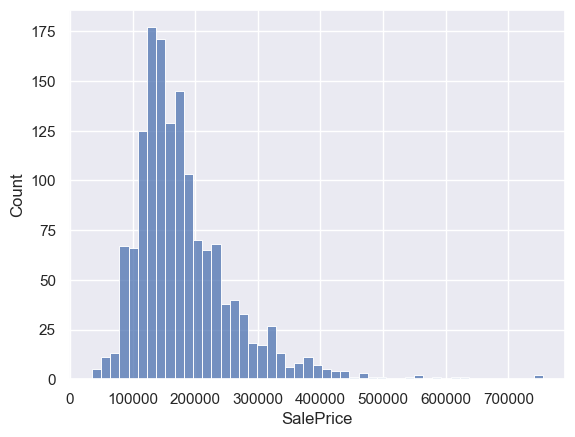

In [13]:
sns.histplot(df_train['SalePrice'])
#skewness and kurtosis
print("Skewness: %f "% df_train['SalePrice'].skew())
print("Kurtosis: %f "% df_train['SalePrice'].kurt())

As we see, the target variable SalePrice is not normally distributed.   
This can reduce the performance of the ML regression models because some assume normal distribution,   
see sklearn info on preprocessing   
Therfore we make a log transformation, the resulting distribution looks much better.

`SkewnessÎäî Î∂ÑÌè¨Ïùò ÎπÑÎåÄÏπ≠ÏÑ±ÏùÑ Ï∏°Ï†ïÌïòÎ©∞, KurtosisÎäî Î∂ÑÌè¨Ïùò Íº¨Î¶¨Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê ÎπÑÌï¥ ÏñºÎßàÎÇò Î¨¥Í±∞Ïö¥ÏßÄÎ•º Ï∏°Ï†ïÌï©ÎãàÎã§.`   

| ÌäπÏßï    | Skewness                                             | Kurtosis                                                                                    |
| ----- | ---------------------------------------------------- | ------------------------------------------------------------------------------------------- |
| Ï†ïÏùò    | ÌôïÎ•† Î∂ÑÌè¨Ïùò ÎπÑÎåÄÏπ≠ÏÑ±ÏùÑ Ï∏°Ï†ïÌïòÎäî ÏßÄÌëúÏûÖÎãàÎã§.                            | Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑ú Î∂ÑÌè¨ÏôÄ ÎπÑÍµêÌïòÏó¨ Íº¨Î¶¨Í∞Ä ÎëêÍªçÍ±∞ÎÇò ÏñáÏùÄÏßÄÎ•º Ï∏°Ï†ïÌïòÎäî ÏßÄÌëúÏûÖÎãàÎã§.                                                  |
| Í∞íÏùò Î≤îÏúÑ | \-0.5ÏóêÏÑú 0.5 ÏÇ¨Ïù¥Îäî ÎåÄÏπ≠ÏûÖÎãàÎã§.   <br> SkewnessÍ∞Ä 1Ïù¥ÎùºÎäî Í≤ÉÏùÄ Î∂ÑÌè¨Í∞Ä Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏπòÏö∞Ï≥êÏ†∏ ÏûàÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ï¶â, Î∂ÑÌè¨Ïùò Íº¨Î¶¨Í∞Ä ÏôºÏ™ΩÎ≥¥Îã§ Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∏∏Ïñ¥Ï°åÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§                            | Ï†ïÍ∑ú Î∂ÑÌè¨Ïùò Ï≤®ÎèÑÎäî 3ÏûÖÎãàÎã§. Ï≤®ÎèÑÍ∞Ä 3Î≥¥Îã§ ÏûëÏúºÎ©¥ ÌèâÌèâÌïú Î∂ÑÌè¨   (platykurtic)ÎùºÍ≥† ÌïòÎ©∞,<br> 3Î≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞Îäî Îæ∞Ï°±Ìïú Î∂ÑÌè¨(leptokurtic)ÎùºÍ≥† Ìï©ÎãàÎã§. |
| Í≥ÑÏÇ∞ Î∞©Î≤ï | Seaborn ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò skew() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ SkewnessÎ•º Í≥ÑÏÇ∞ | Seaborn ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò kurt() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ KurtosisÎ•º Í≥ÑÏÇ∞                                        |

Skewness: 1.882876 
Kurtosis: 6.536282 


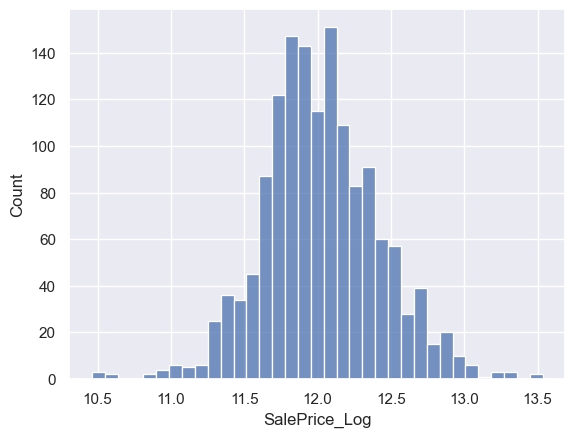

In [14]:
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])
sns.histplot(df_train['SalePrice_Log'])
#skewness and kurtosis
print("Skewness: %f "% df_train['SalePrice'].skew())
print("Kurtosis: %f "% df_train['SalePrice'].kurt())
#dripping old column
df_train.drop('SalePrice', axis = 1, inplace = True)


### 1.1.4 Numerical and Categorical features

In [15]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print('Number of Numberical features : ', len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print('Number of categorical features : ', len(categorical_feats))

Number of Numberical features :  38
Number of categorical features :  43


In [16]:
df_train.dtypes[df_train.dtypes != "object"]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice_Log    float64
dtype: object

In [17]:
print(df_train[numerical_feats].columns)
print('*'* 100)
print(df_train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_Log'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Founda

In [18]:
df_train[numerical_feats].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice_Log  
0      12.247694  
1      12.109011  
2      12.317167  
3      11.849398  
4      12.429216  

[5 rows x 38 columns]

In [19]:
df_train[categorical_feats].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

### 1.1.5List of features with missing values

In [ ]:
üßê concatÎ•º Ïù¥Î†áÍ≤å Ïì∞Îã§Îãà?!!

In [20]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

### 1.1.6 Filling missing values

For a few columns there is lots of NaN entries.   
However, reading the data description we find this is not missing data:   
For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.

In [21]:
#columns where NaN values have meaning e.g. no pool etc
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
                'GarageQual','GarageCond','GarageFinish','GarageType','Electrical',
                'KitchenQual','SaleType','Functional','Exterior2nd','Exterior1st',
                'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1',
                'BsmtFinType2','MSZoning','Utilities']
#replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    df_train[col].fillna('None', inplace=True)
    df_test[col].fillna('None', inplace=True)

In [22]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(5)

Total   Percent
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
MasVnrArea        8  0.005479
Id                0  0.000000
KitchenAbvGr      0  0.000000

In [38]:

#fillna with mean for the remaining columns: LotFrontae, GarageYrBlt, MasVnrArea
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)


In [39]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(5)

Total  Percent
Id                0      0.0
Electrical        0      0.0
GarageCars        0      0.0
GarageFinish      0      0.0
GarageYrBlt       0      0.0

In [40]:
df_train.isnull().sum().sum()

0

In [25]:
df_test.isnull().sum().sum()

330

### 1.1.7 log transformation


Like the target variable, also some of the feature values are not normally distributed and    
it is therefore better to use log values in df_train and df_test. Checking for skewness and kurtosis:

In [26]:
for col in numerical_feats:
    print('{:15}'.format(col),
        'Skewness: {:05.2f}'.format(df_train[col].skew()),
        '  ',
        'Kurtosis: {:06.2f}'.format(df_train[col].kurt())
        )
    

Id              Skewness: 00.00    Kurtosis: -01.20
MSSubClass      Skewness: 01.41    Kurtosis: 001.58
LotFrontage     Skewness: 02.16    Kurtosis: 017.45
LotArea         Skewness: 12.21    Kurtosis: 203.24
OverallQual     Skewness: 00.22    Kurtosis: 000.10
OverallCond     Skewness: 00.69    Kurtosis: 001.11
YearBuilt       Skewness: -0.61    Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50    Kurtosis: -01.27
MasVnrArea      Skewness: 02.67    Kurtosis: 010.08
BsmtFinSF1      Skewness: 01.69    Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26    Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92    Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52    Kurtosis: 013.25
1stFlrSF        Skewness: 01.38    Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81    Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01    Kurtosis: 083.23
GrLivArea       Skewness: 01.37    Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60    Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10    Kurtosis: 016.40
FullBath    

Skewness : 1.366560
Kurtosis : 4.895121


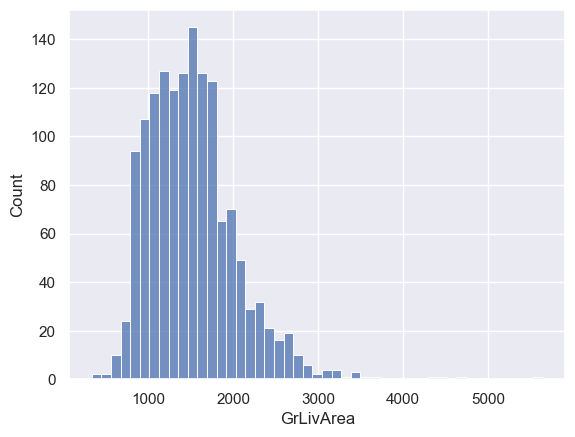

In [27]:
sns.histplot(df_train['GrLivArea'])
#skewness and kurtosis
print("Skewness : %f"% df_train['GrLivArea'].skew())
print("Kurtosis : %f"% df_train['GrLivArea'].kurt())

Skewness : 12.207688
Kurtosis : 203.243271


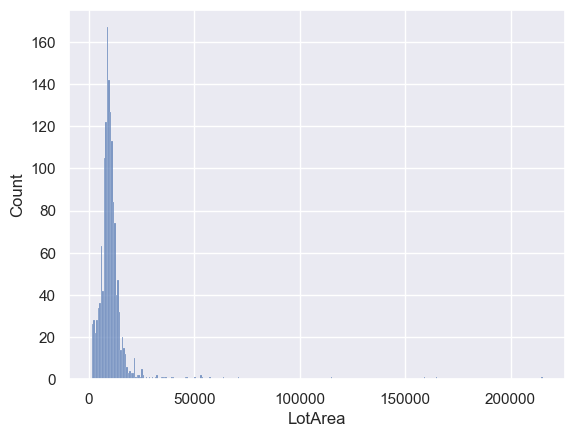

In [28]:
sns.histplot(df_train['LotArea'])
#skewness and kurtosis
print("Skewness : %f"% df_train['LotArea'].skew())
print("Kurtosis : %f"% df_train['LotArea'].kurt())

In [29]:
for df in [df_train, df_test]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace=True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace=True, axis = 1)
    
numerical_feats = df_train.dtypes[df_train.dtypes !='object'].index

In [30]:
numerical_feats = df_train.dtypes[df_train.dtypes !='object'].index

Skewness : -0.006995
Kurtosis : 0.282603


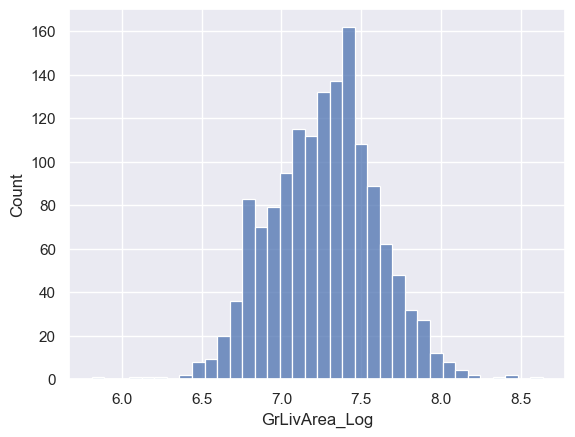

In [31]:
sns.histplot(df_train['GrLivArea_Log'])
#skewness and kurtosis
print("Skewness : %f"% df_train['GrLivArea_Log'].skew())
print("Kurtosis : %f"% df_train['GrLivArea_Log'].kurt())

Skewness : -0.137994
Kurtosis : 4.713358


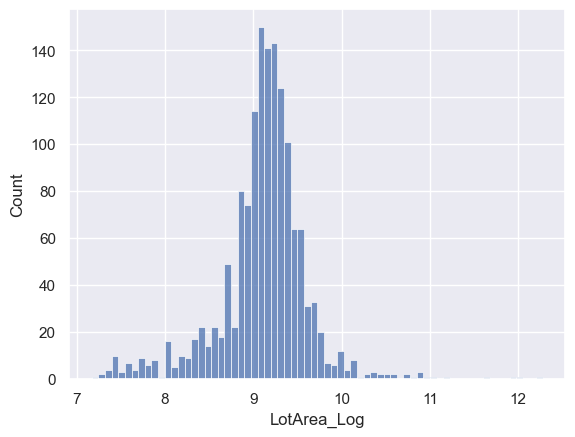

In [32]:
sns.histplot(df_train['LotArea_Log'])
#skewness and kurtosis
print("Skewness : %f"% df_train['LotArea_Log'].skew())
print("Kurtosis : %f"% df_train['LotArea_Log'].kurt())

## 1.2Relation of features to target (SalePrice_log)

### 1-2-1 Plots of relation to target for all numerical features

| Î∞òÌôòÍ∞í | ÏùòÎØ∏              | Ìï¥ÏÑù                                                                                                                                                                                                                                               |
| --- | --------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| r   | ÌîºÏñ¥Ïä® ÏÉÅÍ¥Ä Í≥ÑÏàò       | Îëê Î≥ÄÏàò Í∞ÑÏùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Î©∞, -1ÏóêÏÑú +1ÍπåÏßÄÏùò Í∞íÏùÑ Í∞ÄÏßëÎãàÎã§. <br>r Í∞íÏù¥ -1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îëê Î≥ÄÏàò Í∞ÑÏùò ÏùåÏùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÍ∞Ä Í∞ïÌïòÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, <br>0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îëê Î≥ÄÏàò Í∞ÑÏùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. <br>r Í∞íÏù¥ +1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îëê Î≥ÄÏàò Í∞ÑÏùò ÏñëÏùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÍ∞Ä Í∞ïÌïòÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.                                                                    |
| p   | ÎπÑÏÉÅÍ¥ÄÏÑ± Í≤ÄÏ†ïÏùÑ ÏúÑÌïú p-Í∞í | Îëê Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä Ïú†ÏùòÌïúÏßÄ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Î©∞, ÏùºÎ∞òÏ†ÅÏúºÎ°ú 0.05Î≥¥Îã§ ÏûëÏúºÎ©¥ Ïú†ÏùòÌïòÎã§Í≥† ÌåêÎã®Ìï©ÎãàÎã§.<br>p-Í∞íÏùÄ Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ ÎßûÏùÑ ÌôïÎ•†Ïù¥ ÏïÑÎãàÎùº, Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ ÎßûÎã§Îäî Í∞ÄÏ†ï ÌïòÏóê ÌëúÎ≥∏ÏóêÏÑú Í¥ÄÏ∏°Îêú ÌÜµÍ≥ÑÎüâÎ≥¥Îã§ Îçî Í∑πÎã®Ï†ÅÏù∏ Í∞íÏù¥ ÎÇòÏò¨ ÌôïÎ•†ÏûÖÎãàÎã§. <br> Ïù¥ ÌôïÎ•†Ïù¥ ÏûëÏùÑÏàòÎ°ù Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏûàÎäî Ï¶ùÍ±∞Í∞Ä ÎêúÎã§Í≥† Î≥º Ïàò ÏûàÏäµÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, p-Í∞íÏù¥ 0.05Î≥¥Îã§ ÏûëÏúºÎ©¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏûàÎäî Ï¶ùÍ±∞Í∞Ä ÎêúÎã§Í≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§. |

- Ìï¥ÏÑù   
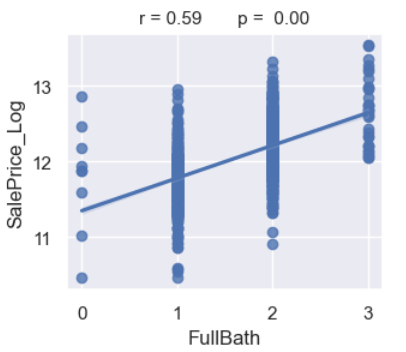   
<!--SalePriceÏôÄ FullBathÏôÄÏùò Í¥ÄÍ≥ÑÏóêÏÑú ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò rÏùÄ `0.59`Î°ú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§Í≥† Î≥¥ÏïòÍ≥†, Ïù¥Îü¥Îïå ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎßûÏßÄ ÏïäÎã§Îäî Í≤ÉÏù¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ïù¥Îã§.  Ïù¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∞ÄÏ†ïÌïòÍ≤å ÌÜµÍ≥ÑÎüâ Î≥¥Îã§ Îçî Í∑πÎã®Ï†ÅÏù∏ Í∞íÏù¥ ÎÇòÏò¨ ÌôïÎ•†Ïù¥ 0Ïù¥ÎØÄÎ°ú Ïù¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÎêúÎã§. Í∑∏ÎûòÏÑú PÍ∞Ä 0Ïù¥ÎØÄÎ°ú rÏùò Í∞ÄÏ†ïÏùÄ ÎßûÎäî Í≤ÉÏù¥ÎùºÎäî Ï¶ùÍ±∞Í∞Ä ÎêúÎã§.  <br>
Í≤∞Î°† r=0.59 ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇòÌÉÄÎÇòÍ≥†, p=0Ïù¥ÎØÄÎ°ú Ïù¥Í≤ÉÏùÄ Ïú†Ïùò(ÎØ∏)ÌïòÎã§.-->

<br><br>
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî Îëê Î≥ÄÏàòÍ∞ÑÏùò ÏÑ†ÌòïÏ†ÅÏù∏ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëúÏûÖÎãàÎã§. ÏÉÅÍ¥ÄÍ≥ÑÏàòÏùò Í∞íÏù¥ 0.59Ïù¥ÎùºÎ©¥ Îëê Î≥ÄÏàòÍ∞ÑÏóêÎäî Ïñ¥Îäê Ï†ïÎèÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏùåÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§1.   

Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0)ÏùÄ Îëê Î≥ÄÏàòÍ∞ÑÏóê ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§Îäî Í≤ÉÏûÖÎãàÎã§. ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1)ÏùÄ Îëê Î≥ÄÏàòÍ∞ÑÏóê ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§Îäî Í≤ÉÏûÖÎãàÎã§12.   
| Í∞ÄÏÑ§       | ÎÇ¥Ïö©              |
| -------- | --------------- |
| Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0) | Îëê Î≥ÄÏàòÍ∞ÑÏóê ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§ |
| ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1) | Îëê Î≥ÄÏàòÍ∞ÑÏóê ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§ |   

p=0Ïù¥ÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïóê ÎåÄÌïú ÌôïÎ•†Ïù¥ ÎÜíÏßÄ ÏïäÏúºÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÄ Í∏∞Í∞ÅÎêúÎã§. Í≤∞Î°†ÏùÄ Îëê Î≥ÄÏàòÍ∞ÑÏóê `ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§`


- Ìï¥ÏÑù    
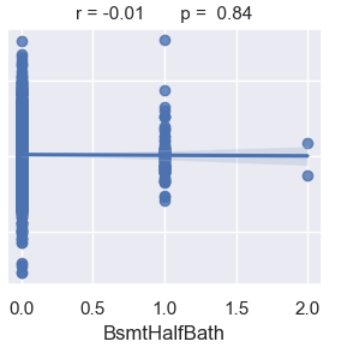
<!-- r=-0.01 Ïùò Í≤ΩÏö∞ Í±∞Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§ÎùºÍ≥† Î≥¥Ïó¨ÏßÄÍ≥†, Ïù¥Í≤ÉÏùÑ Î∞òÎåÄÎ°ú ÌïòÎäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÄ 'ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§' Ïù¥Îã§.
Í∑∏Îü∞Îç∞ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§ÎùºÎäî Í∞ÄÏ†ïÏóêÏÑú Îçî Í∑πÎã®Ï†ÅÏù∏ Í∞íÏù¥ ÎÇòÏò¨ ÌôïÎ•† ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§Îäî Ï¶ùÍ±∞Îì§Ïù¥ 84%Ïù¥ÎØÄÎ°ú Ïù¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÄ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÍ≤åÎêòÍ≥†, 
Í≤∞Î°†ÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§Îäî Ï£ºÏû•ÏùÄ -->
<br><br>
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä -0.01Ïùº Îïå Í∑ÄÎ¨¥Í∞ÄÏÑ§Í≥º ÎåÄÎ¶ΩÍ∞ÄÏÑ§ÏùÑ ÌëúÎ°ú ÎÇòÌÉÄÎÇ¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.   
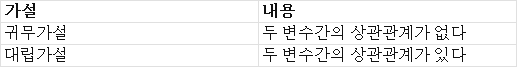   
p=0.84Ïù¥ÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Í∏∞Í∞ÅÎêòÏßÄ ÏïäÎäîÎã§. Îî∞ÎùºÏÑú Îëê Î≥ÄÏàòÏóê ÎåÄÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎäî ÏóÜÎã§Í≥† Ìï† Ïàò ÏûàÎã§.


In [37]:
numerical_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice_Log', 'GrLivArea_Log', 'LotArea_Log'],
      dtype='object')

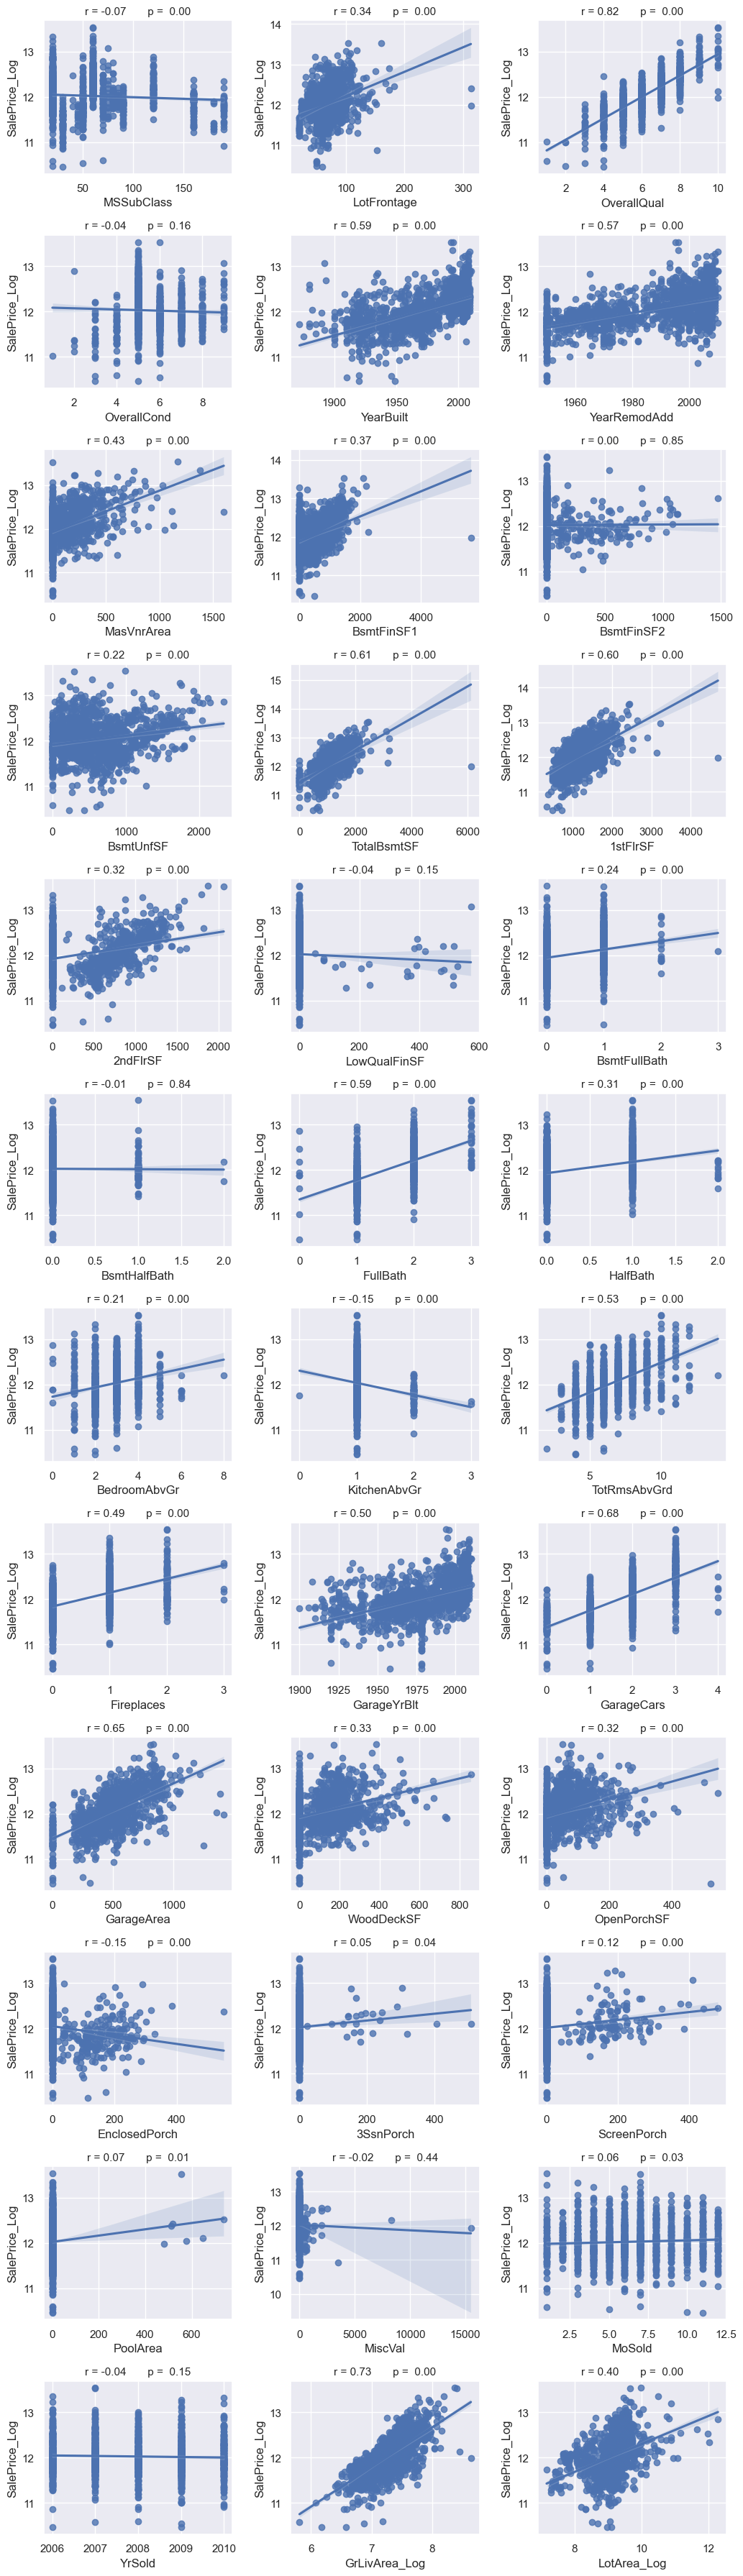

In [41]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5, nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r * nr_cols + c
        if i < len(li_plot_num_feats):
            sns.regplot(x=df_train[li_plot_num_feats[i]], y=df_train[target], ax=axs[r][c])
            #sns.regplot(df_train[li_plot_num_feats[i]], df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
            #axs[r][c].text(0.4, 0.9, 'title', fontsize=7)
            str_title = 'r = ' + '{0:.2f}'.format(stp[0]) +'       p =  ' + '{0:.2f}'.format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)
plt.tight_layout()
plt.show()

Conclusion from EDA on numerical columns:
We see that for some features like 'OverallQual' there is a strong linear correlation (0.79) to the target.   
For other features like 'MSSubClass' the correlation is very weak.   
For this kernel I decided to use only those features for prediction that have a correlation larger than a threshold value to SalePrice.   
This threshold value can be choosen in the global settings : min_val_corr   

With the default threshold for min_val_corr = 0.4, these features are dropped in Part 2, Data Wrangling:   
'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'

We also see that the entries for some of the numerical columns are in fact categorical values.   
For example, the numbers for 'OverallQual' and 'MSSubClass' represent a certain group for that feature ( see data description txt)<br>  <br>
'OverallQual‚ÄôÏôÄ Í∞ôÏùÄ ÏùºÎ∂Ä Í∏∞Îä•Ïùò Í≤ΩÏö∞ ÎåÄÏÉÅÍ≥º Í∞ïÌïú ÏÑ†Ìòï ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ(0.79)Í∞Ä ÏûàÏäµÎãàÎã§.
'MSSubClass‚ÄôÏôÄ Í∞ôÏùÄ Îã§Î•∏ Í∏∞Îä•Ïùò Í≤ΩÏö∞ ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä Îß§Ïö∞ ÏïΩÌï©ÎãàÎã§.
Ïù¥ Ïª§ÎÑêÏóêÏÑúÎäî SalePriceÏóê ÎåÄÌïú ÏûÑÍ≥ÑÍ∞íÎ≥¥Îã§ ÌÅ∞ ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑ ÏòàÏ∏°ÏóêÎßå Ìï¥Îãπ Í∏∞Îä•ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞Î°ú Í≤∞Ï†ïÌñàÏäµÎãàÎã§.
Ïù¥ ÏûÑÍ≥ÑÍ∞íÏùÄ Ï†ÑÏó≠ ÏÑ§Ï†ïÏóêÏÑú ÏÑ†ÌÉùÌï† Ïàò ÏûàÏäµÎãàÎã§ : min_val_corr

Í∏∞Î≥∏ ÏûÑÍ≥ÑÍ∞í min_val_corr = 0.4Î°ú Ïù¥Îü¨Ìïú Í∏∞Îä•ÏùÄ Part 2, Data WranglingÏóêÏÑú ÏÇ≠Ï†úÎê©ÎãàÎã§.
‚ÄòId‚Äô, ‚ÄòMSSubClass‚Äô, ‚ÄòLotArea‚Äô, ‚ÄòOverallCond‚Äô, ‚ÄòBsmtFinSF2‚Äô, ‚ÄòBsmtUnfSF‚Äô, ‚ÄòLowQualFinSF‚Äô, ‚ÄòBsmtFullBath‚Äô, ‚ÄòBsmtHalfBath‚Äô, ‚ÄòHalfBath‚Äô, ‚ÄòBedroomAbvGr‚Äô, ‚ÄòKitchenAbvGr‚Äô, ‚ÄòEnclosedPorch‚Äô, ‚Äò3SsnPorch‚Äô, ‚ÄòScreenPorch‚Äô, ‚ÄòPoolArea‚Äô, ‚ÄòMiscVal‚Äô, ‚ÄòMoSold‚Äô, ‚ÄòYrSold‚Äô

ÎòêÌïú ÏùºÎ∂Ä Ïà´Ïûê Ïó¥Ïùò Ìï≠Î™©ÏùÄ Ïã§Ï†úÎ°ú Î≤îÏ£º Í∞íÏûÖÎãàÎã§.
ÏòàÎ•º Îì§Ïñ¥, ‚ÄòOverallQual‚Äô Î∞è 'MSSubClass‚ÄôÏùò Ïà´ÏûêÎäî Ìï¥Îãπ Í∏∞Îä•Ïùò ÌäπÏ†ï Í∑∏Î£πÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§(Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö txt Ï∞∏Ï°∞) 

Outliers

In [42]:
df_train = df_train.drop(
    df_train[(df_train['OverallQual'] ==10) & (df_train['SalePrice_Log'] <12.3)].index
    )

In [43]:
df_train = df_train.drop(
    df_train[(df_train['GrLivArea_Log'] ==10) & (df_train['SalePrice_Log'] <12.3)].index
    )

__Find columns with strong correlation to target___   
Only those with r > min_val_corr are used in the ML Regressors in Part 3    
The value for min_val_corr can be chosen in global settings   

In [44]:
corr = df_train.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

List of numerical features and their correlation coefficient to target

In [45]:
print(ser_corr)
print('*'*30)
print('List of numerical features with r above min_val_corr :')
print(cols_abv_corr_limit)
print('*'*30)
print('List of numerical features with r below min_val_corr :')
print(cols_bel_corr_limit)

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
LotArea_Log      0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: SalePr

List of categorical features and their unique values¬∂

In [46]:
for catg in list(categorical_feats):
    print(df_train[catg].value_counts())
    print('#'*50)

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1452
Grvl       6
Name: Street, dtype: int64
##################################################
None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64
###########################

Relation to SalePrice for all categorical features

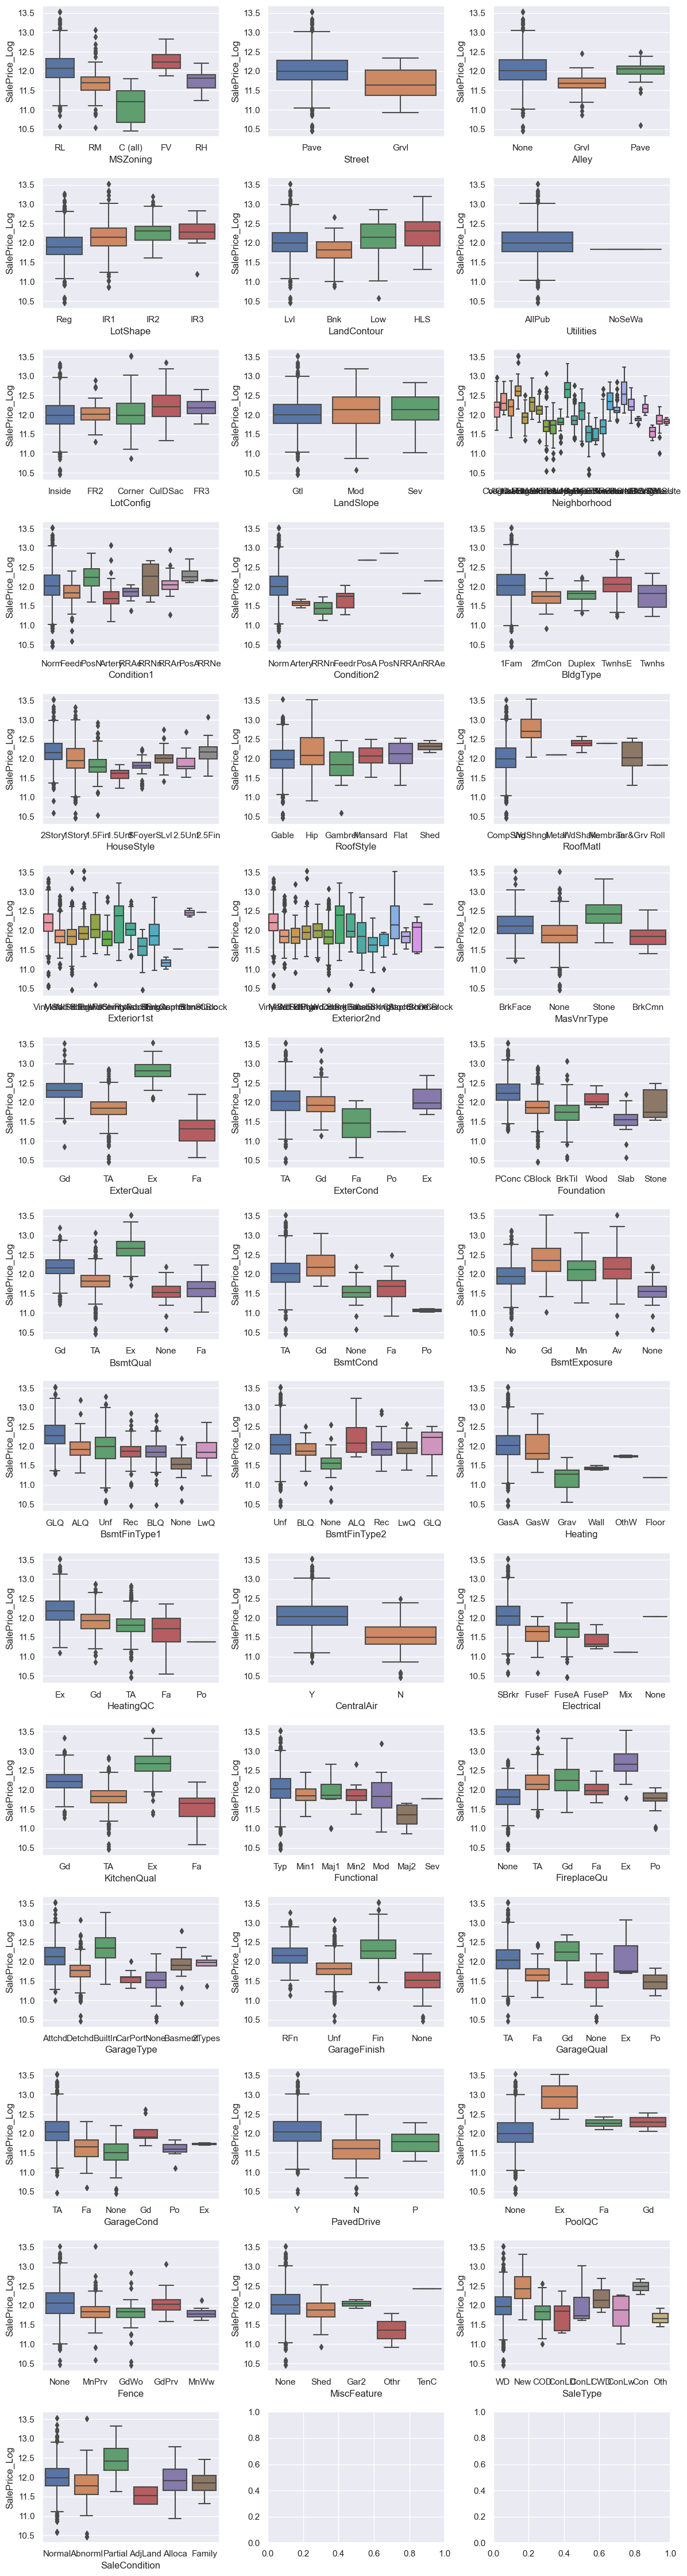

In [47]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols , figsize = (nr_cols * 4, nr_rows * 3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r * nr_cols + c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data = df_train, ax = axs[r][c])
            
plt.tight_layout()
plt.show()

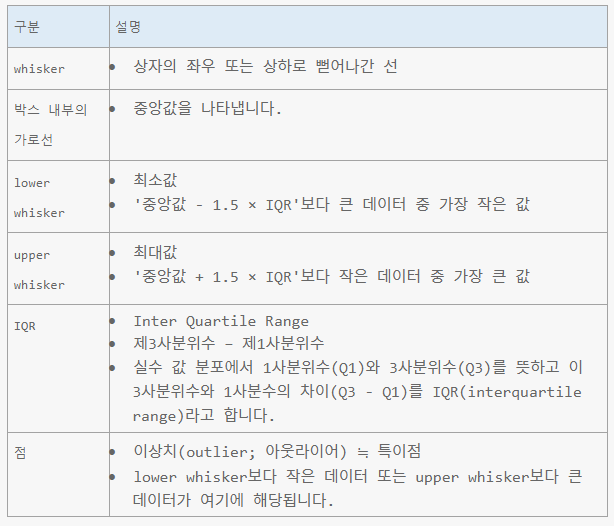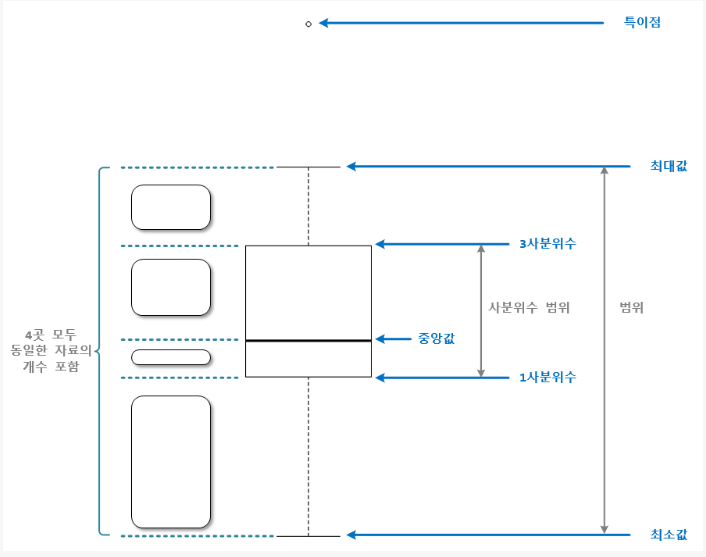

Conclusion from EDA on categorical columns:   

For many of the categorical there is no strong relation to the target.
However, for some fetaures it is easy to find a strong relation.
From the figures above these are : `'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'` Also for the categorical features, I use only those that show a strong relation to SalePrice. So the other columns are dropped when creating the ML dataframes in Part 2 :
'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition'



In [48]:
catg_strong_corr= ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                    'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                    'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                    'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
                    'SaleCondition']

üßê Ïñ¥ÎñªÍ≤å ÏúÑÏùò ÎÇ¥ÏöîÏù¥ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎùºÍ≥† Î∂ÑÎ•òÌï† Ïàò ÏûàÏßÄ? Í∑ºÍ±∞Îäî?


Correlation matrix 1

__Features with largest correlation to SalePrice_Log__   
all numerical features with correlation coefficient above threshold

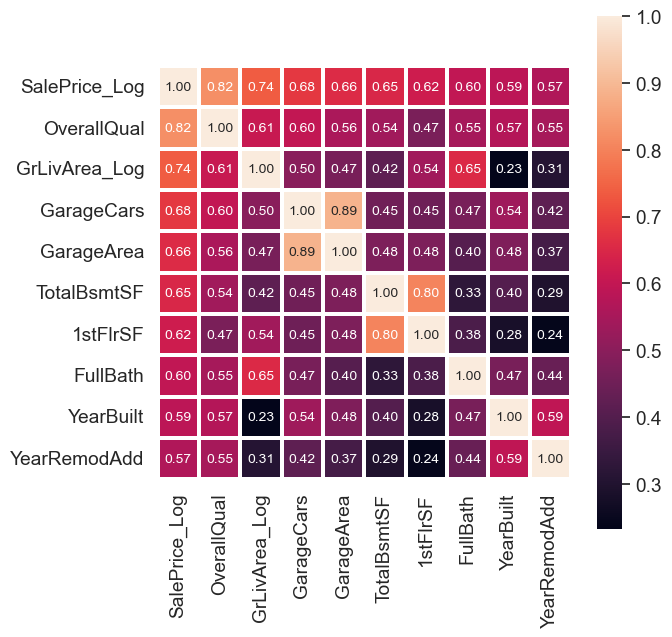

In [51]:
nr_feats = len(catg_strong_corr)
plot_corr_matrix(df_train, nr_feats, target)

Of those features with the largest correlation to SalePrice, some also are correlated strongly to each other.   
To avoid failures of the ML regression models due to multicollinearity, these are dropped in part 2.   
This is optional and controlled by the switch drop_similar (global settings)

# Part 2: Data wrangling

Îç∞Ïù¥ÌÑ∞ Îû≠Í∏ÄÎßÅ(Data wrangling) ÌòπÏùÄ Îç∞Ïù¥ÌÑ∞ Î®ºÏßï(Data munging)ÏùÄ ÏõêÏûêÎ£å(raw data)Î•º Î≥¥Îã§ ÏâΩÍ≤å Ï†ëÍ∑ºÌïòÍ≥† Î∂ÑÏÑùÌï† Ïàò ÏûàÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÎ¶¨ÌïòÍ≥† ÌÜµÌï©ÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§¬π¬≤. Ïù¥Î•º ÌÜµÌï¥ÏÑú Î∞òÏûêÎèôÌôî ÎèÑÍµ¨Ïùò ÎèÑÏõÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï¢Ä Îçî Ìé∏Î¶¨ÌïòÍ≤å ÏÜåÎπÑÌï† Ïàò ÏûàÏäµÎãàÎã§.   

Ï∂úÏ≤ò: BingÍ≥ºÏùò ÎåÄÌôî, 2023. 4. 20.   
(1) Data wrangling - Wikipedia. https://en.wikipedia.org/wiki/Data_wrangling.   
(2) Îç∞Ïù¥ÌÑ∞ Îû≠Í∏ÄÎßÅ - ÏúÑÌÇ§Î∞±Í≥º, Ïö∞Î¶¨ Î™®ÎëêÏùò Î∞±Í≥ºÏÇ¨Ï†Ñ. https://ko.wikipedia.org/wiki/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%9E%AD%EA%B8%80%EB%A7%81.   
(3) What Is Data Wrangling? Definition, Steps, and Why It Matters. https://www.coursera.org/articles/data-wrangling.

__Drop all columns with only small correlation to SalePrice   
Transform Categorical to numerical   
Handling columns with missing data   
Log values   
Drop all columns with strong correlation to similar features__

Numerical columns : drop similar and low correlation   
Categorical columns : Transform to numerical

Dropping all columns with weak correlation to SalePrice

In [52]:
id_test = df_test['Id']

to_drop_num = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg

for df in [df_train, df_test]:
    df.drop(cols_to_drop, inplace=True, axis=1)

__Convert categorical columns to numerical__   
For those categorcial features where the EDA with boxplots seem to show a strong dependence of the SalePrice on the category,<br>   we  transform the columns to numerical. To investigate the relation of the categories to SalePrice in more detail, we make violinplots<br> for    these features Also, we look at the mean of SalePrice as function of category.

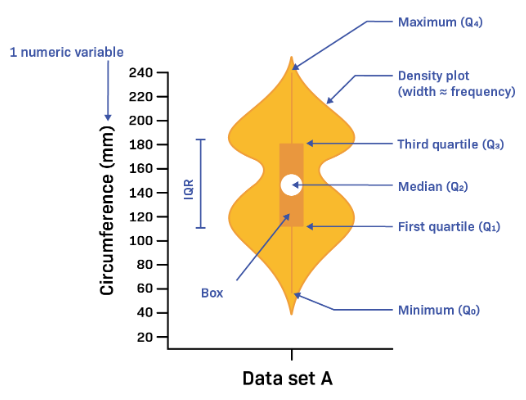   
Í≤∞Íµ≠ Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°ØÏùÄ KDE ÌîåÎ°ØÍ≥º Box ÌîåÎ°ØÏùÑ ÌïòÎÇòÎ°ú Ìï©Ï≥êÎÜìÏùÄ ÌòïÌÉúÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎ©¥ ÎêúÎã§

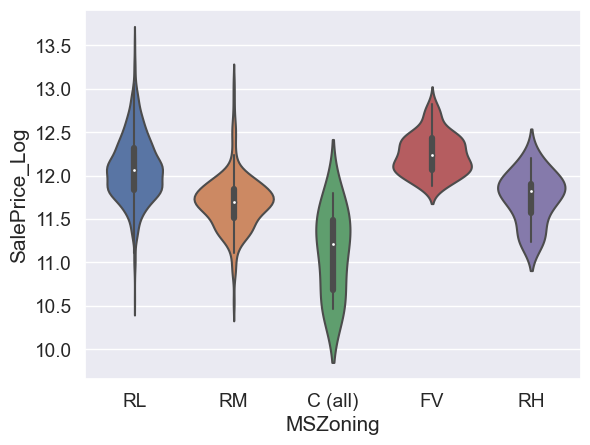

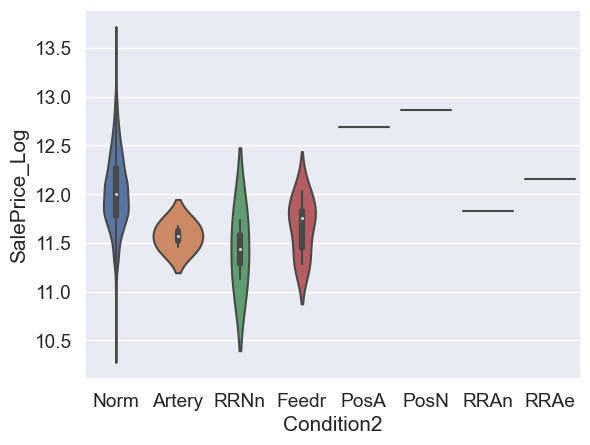

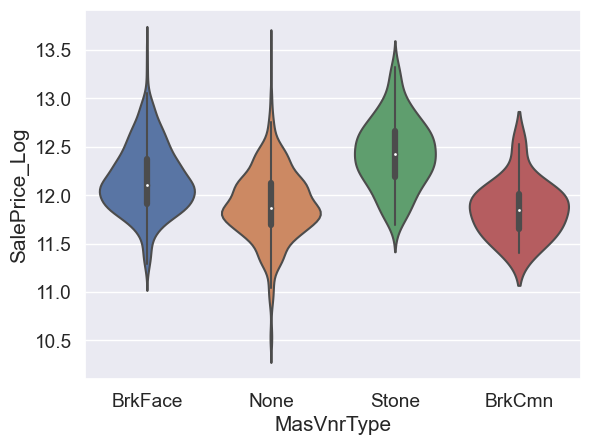

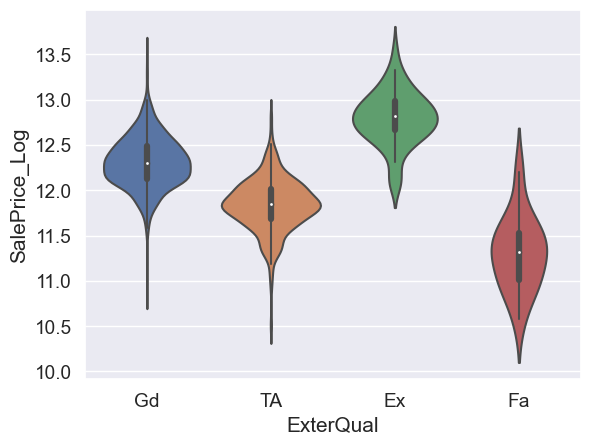

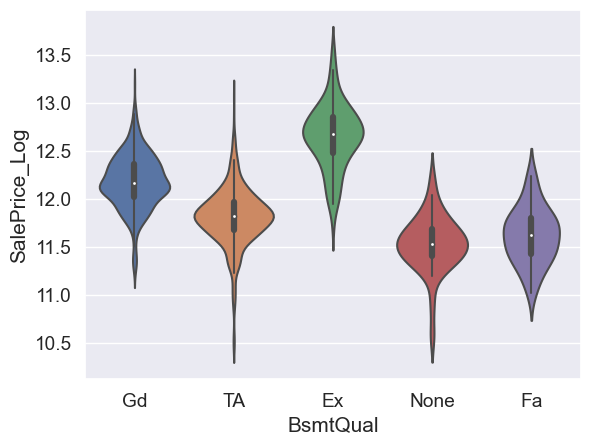

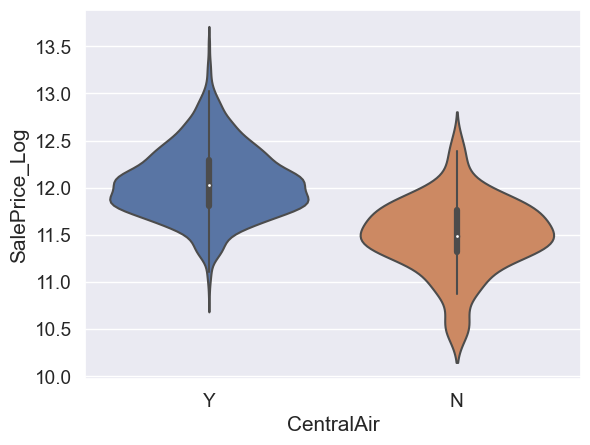

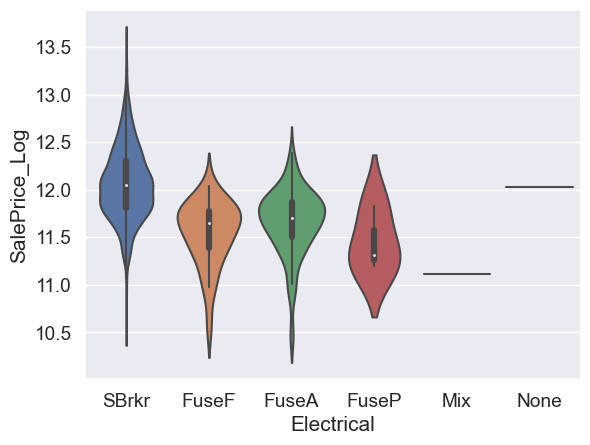

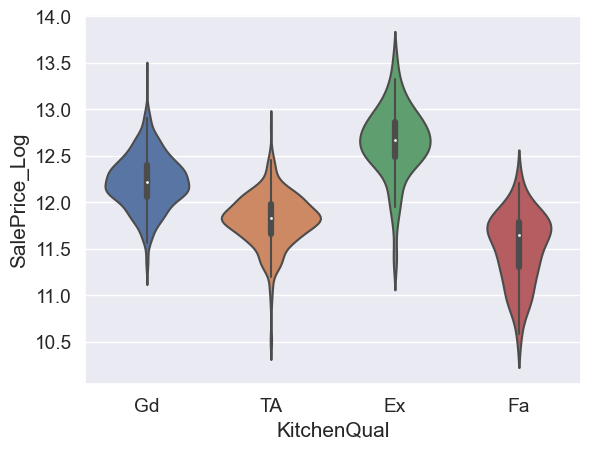

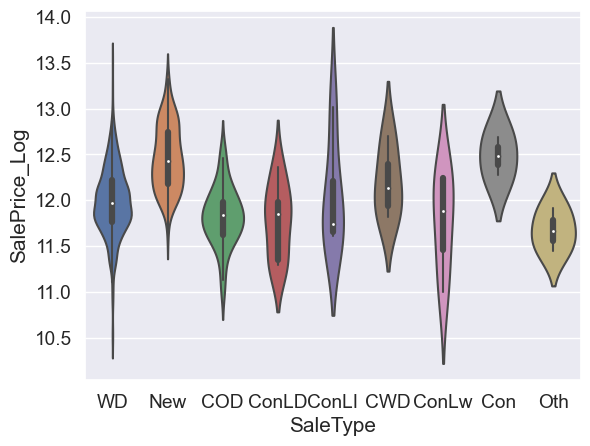

In [53]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')

for catg in catg_list:
    #sns.catplot(x=catg, y=target, data=df_train, kind='boxen')
    sns.violinplot(x=catg, y=target, data=df_train)
    plt.show()
    #sns.boxenplot(x=catg, y=target, data=df_train)
    #bg = df_train.boxplot(column=[target], by=catg)

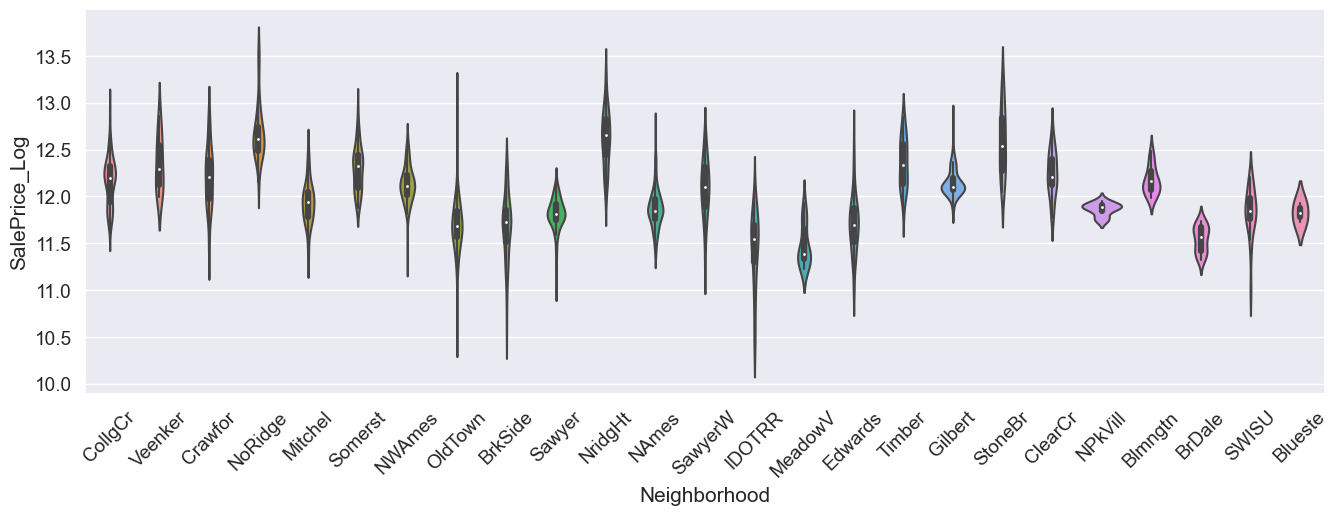

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16,5)
sns.violinplot(x='Neighborhood', y = target, data=df_train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [54]:
for catg in catg_list:
    g = df_train.groupby(catg)[target].mean()
    print(g)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.860999
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.431016
Name: SalePrice_Log, dtype: float64
ExterQual
Ex    12.792412
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrice_Log, dtype: float64
BsmtQual
Ex      12.650235
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: SalePrice_Log, dtype: float64
CentralAir
N    11.491858
Y    12.061099
Name: SalePrice_Log, dtype: float64
Electrical
FuseA    11.660315
FuseF    11.539624
FuseP    11.446808
Mix      11.112448
None     12.028739
SBrkr    12.061474
Name: SalePrice_Log, dtype: float64
KitchenQual
Ex    12.645425
F

In [55]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH'] #11.5 Ïù¥ÏÉÅ 12ÎØ∏Îßå
msz_catg3 = ['RL', 'FV'] #12Ïù¥ÏÉÅ


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker'] # 12~12.5
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']#12.5Ïù¥ÏÉÅ

# Condition2
cond2_catg2 = ['Norm', 'RRAe'] #12~12.5ÎØ∏Îßå
cond2_catg3 = ['PosA', 'PosN'] #12.5Ïù¥ÏÉÅ

# SaleType
SlTy_catg1 = ['Oth'] #11.7ÎØ∏Îßå
SlTy_catg3 = ['CWD'] #12Ïù¥ÏÉÅ 12.4ÎØ∏Îßå
SlTy_catg4 = ['New', 'Con'] # 12.4Ïù¥ÏÉÅ


In [56]:
for df in [df_train, df_test]:
    
    df['MSZ_num'] = 1
    df.loc[(df['MSZoning'].isin(msz_catg2)), 'MSZ_num'] = 2
    df.loc[(df['MSZoning'].isin(msz_catg3)), 'MSZ_num'] = 3
    
    df['NbHd_num'] = 1
    df.loc[(df['Neighborhood'].isin(nbhd_catg2)), 'NbHd_num'] = 2
    df.loc[(df['Neighborhood'].isin(nbhd_catg3)), 'NbHd_num'] = 3
    
    df['Cond2_num'] = 1
    df.loc[(df['Condition2'].isin(cond2_catg2)), 'Cond2_num'] = 2
    df.loc[(df['Condition2'].isin(cond2_catg2)), 'Cond2_num'] = 3
    
    df['Mas_num'] = 1
    df.loc[(df['MasVnrType']=='Stone'), 'Mas_num'] = 2
    
    df['ExtQ_num'] = 1
    df.loc[(df['ExterQual']=='TA'), 'ExtQ_num'] = 2
    df.loc[(df['ExterQual']=='Gd'), 'ExtQ_num'] = 3
    df.loc[(df['ExterQual']=='Ex'), 'ExtQ_num'] = 4
    
    df['BsQ_num'] = 1
    df.loc[(df['BsmtQual']=='Gd'), 'BsQ_num'] = 2
    df.loc[(df['BsmtQual']=='Ex'), 'BsQ_num'] = 3

    df['CA_num'] = 0
    df.loc[(df['CentralAir']=='Y'), 'CA_num'] = 1

    df['Elc_num'] = 1
    df.loc[(df['Electrical']=='SBrkr'), 'Elc_num'] = 2
    
    df['KiQ_num'] = 1
    df.loc[(df['KitchenQual']=='TA'), 'KiQ_num'] = 2
    df.loc[(df['KitchenQual']=='Gd'), 'KiQ_num'] = 3
    df.loc[(df['KitchenQual']=='Ex'), 'KiQ_num'] = 4
    
    df['SlTy_num'] = 2
    df.loc[(df['SaleType'].isin(SlTy_catg1)), 'SlTy_num'] = 1
    df.loc[(df['SaleType'].isin(SlTy_catg3)), 'SlTy_num'] = 3
    df.loc[(df['SaleType'].isin(SlTy_catg4)), 'SlTy_num'] = 4
    


Checking correlation to SalePrice for the new numerical columns

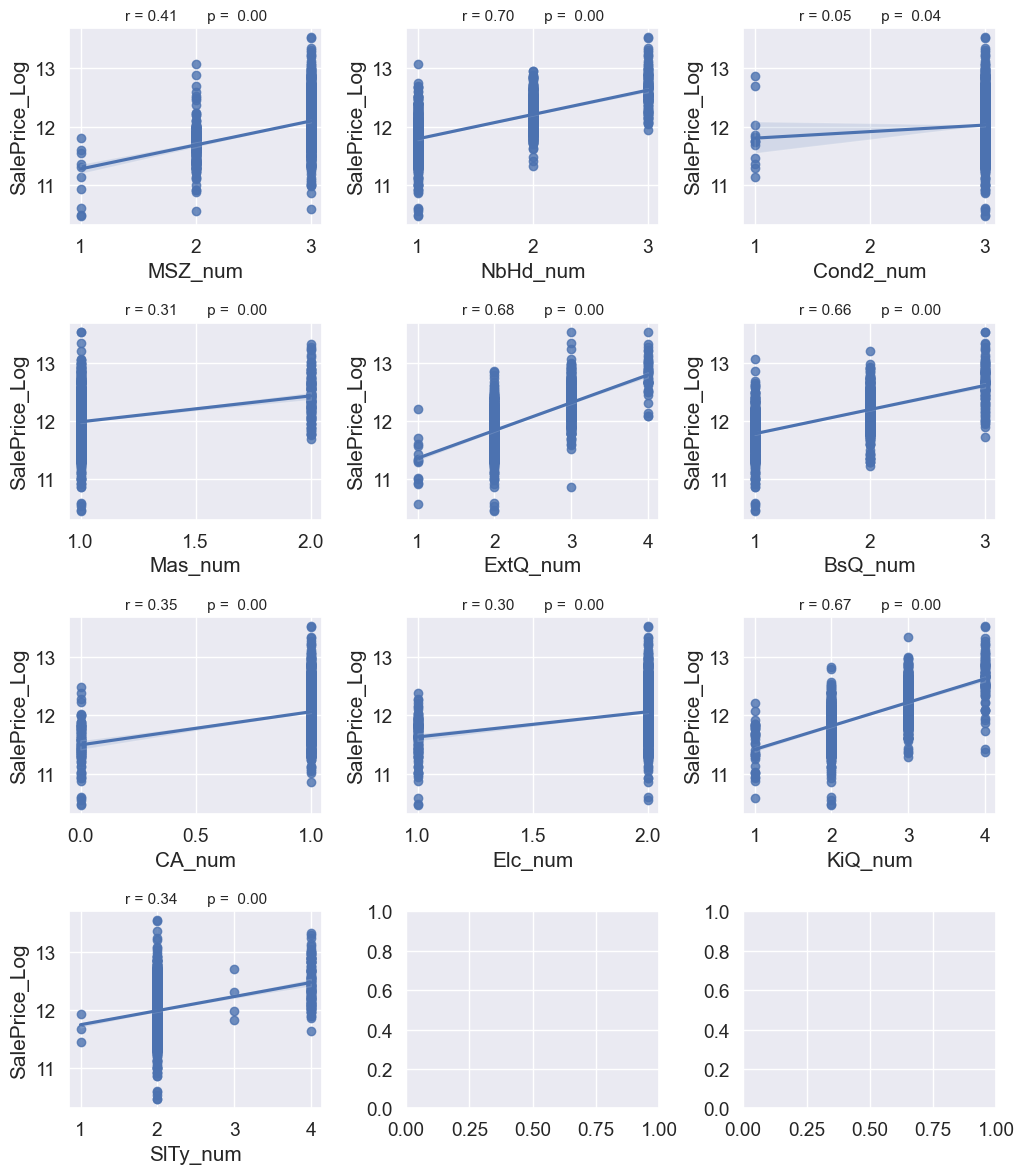

In [57]:
new_col_num =['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize =(nr_cols * 3.5, nr_rows * 3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r * nr_cols + c
        if i < len(new_col_num):
            sns.regplot(x= df_train[new_col_num[i]], y=df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[new_col_num[i]], df_train[target])
            str_title = 'r = ' + '{0:.2f}'.format(stp[0]) +'       p =  ' + '{0:.2f}'.format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)
plt.tight_layout()
plt.show()

There are few columns with quite large correlation to SalePrice (NbHd_num, ExtQ_num, BsQ_num, KiQ_num).   
These will probably be useful for optimal performance of the Regressors in part 3.

Dropping the converted categorical columns and the new numerical columns with weak correlation

columns and correlation before dropping

In [58]:
catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical',
                    'KitchenQual', 'SaleType']

corr1 = df_train.corr()
corr_abs_1 = corr1.abs()

nr_all_cols = len(df_train)
ser_corr_1 = corr_abs_1.nlargest(nr_all_cols, target)[target]

print(ser_corr_1)
cols_bel_corr_limit_1 = list(ser_corr_1[ser_corr_1.values <= min_val_corr].index)

for df in [df_train, df_test]:
    df.drop(catg_cols_to_drop, inplace = True, axis = 1)
    df.drop(cols_bel_corr_limit_1, inplace = True, axis=1)


SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_Log      0.402814
CA_num           0.351598
SlTy_num         0.337469
Mas_num          0.313280
Elc_num          0.304857
Cond2_num        0.052916
Name: SalePrice_Log, dtype: float64


columns and correlation after dropping

In [59]:
corr2=df_train.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(df_train)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]

print(ser_corr_2)

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_Log      0.402814
Name: SalePrice_Log, dtype: float64


new dataframes

In [60]:
df_train.head()

MSZoning  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
0       RL            7       2003          2003       196.0          856   
1       RL            6       1976          1976         0.0         1262   
2       RL            7       2001          2002       162.0          920   
3       RL            7       1915          1970         0.0          756   
4       RL            8       2000          2000       350.0         1145   

   1stFlrSF  FullBath  TotRmsAbvGrd  Fireplaces  ...  GarageCars  GarageArea  \
0       856         2             8           0  ...           2         548   
1      1262         2             6           1  ...           2         460   
2       920         2             6           1  ...           2         608   
3       961         1             7           1  ...           3         642   
4      1145         2             9           1  ...           3         836   

   SalePrice_Log  GrLivArea_Log  LotArea_Log  MSZ_num  NbHd_num  ExtQ_num  \
0      12.247694       7.444249     9.041922        3         2         3   
1      12.109011       7.140453     9.169518        3         2         2   
2      12.317167       7.487734     9.328123        3         2         3   
3      11.849398       7.448334     9.164296        3         2         2   
4      12.429216       7.695303     9.565214        3         3         3   

   BsQ_num  KiQ_num  
0        2        3  
1        2        2  
2        2        3  
3        1        3  
4        2        3  

[5 rows x 21 columns]

In [61]:
df_test.head()

MSZoning  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
0       RH            5       1961          1961         0.0        882.0   
1       RL            6       1958          1958       108.0       1329.0   
2       RL            5       1997          1998         0.0        928.0   
3       RL            6       1998          1998        20.0        926.0   
4       RL            8       1992          1992         0.0       1280.0   

   1stFlrSF  FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0       896         1             5           0       1961.0         1.0   
1      1329         1             6           0       1958.0         1.0   
2       928         2             6           1       1997.0         2.0   
3       926         2             7           1       1998.0         2.0   
4      1280         2             5           0       1992.0         2.0   

   GarageArea  GrLivArea_Log  LotArea_Log  MSZ_num  NbHd_num  ExtQ_num  \
0       730.0       6.797940     9.360655        2         1         2   
1       312.0       7.192182     9.565704        3         1         2   
2       482.0       7.395722     9.534595        3         2         2   
3       470.0       7.380256     9.208138        3         2         2   
4       506.0       7.154615     8.518193        3         3         3   

   BsQ_num  KiQ_num  
0        1        2  
1        1        3  
2        2        2  
3        1        3  
4        2        3

__List of all features with strong correlation to SalePrice_Log__   
after dropping all coumns with weak correlation

In [62]:
corr = df_train.corr()
corr_abs = corr.abs()

nr_all_cols = len(df_train)
print(corr_abs.nlargest(nr_all_cols, target)[target])

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_Log      0.402814
Name: SalePrice_Log, dtype: float64


Correlation Matrix 2 : All features with strong correlation to SalePrice

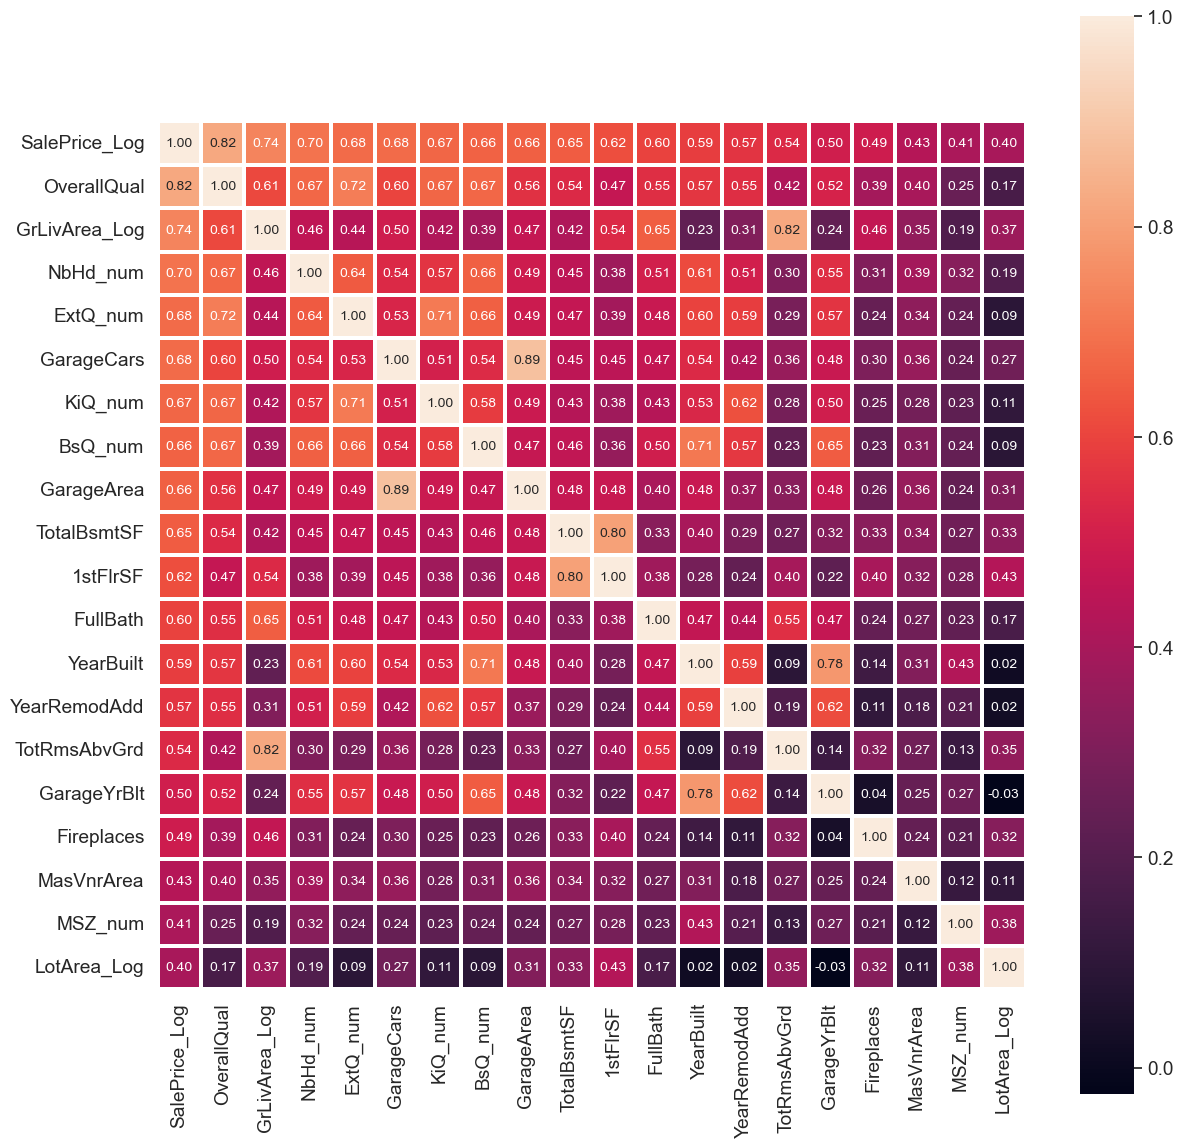

In [63]:
nr_feats = len(df_train.columns)
plot_corr_matrix(df_train, nr_feats, target)

__Check for Multicollinearity__   
Strong correlation of these features to other, similar features:   

'GrLivArea_Log' and 'TotRmsAbvGrd'   

'GarageCars' and 'GarageArea'   

'TotalBsmtSF' and '1stFlrSF'   

'YearBuilt' and 'GarageYrBlt'   

__Of those features we drop the one that has smaller correlation coeffiecient to Target.__



In [64]:
cols = corr_abs.nlargest(nr_all_cols,target)[target].index
cols = list(cols)

if drop_similar == 1:
    for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
        if col in cols:
            cols.remove(col)

In [65]:
cols = list(cols)
print(cols) # 16Í∞ú

['SalePrice_Log', 'OverallQual', 'GrLivArea_Log', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_Log']


List of features used for the Regressors in Part 3

In [66]:
feats = cols.copy()
feats.remove('SalePrice_Log')

print(feats)

['OverallQual', 'GrLivArea_Log', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_Log']


In [67]:
df_train_ml = df_train[feats].copy()
df_test_ml = df_test[feats].copy()

y = df_train[target]

__Combine train and test data__   
for one hot encoding (use pandas get dummies) of all categorical features   
uncommenting the following cell increases the number of features   
up to now, all models in Part 3 are optimized for not applying one hot encoder   
when applied, GridSearchCV needs to be rerun

In [ ]:
"""
all_data = pd.concat((df_train[feats], df_test[feats]))

li_get_dummies = ['OverallQual', 'NbHd_num', 'GarageCars','ExtQ_num', 'KiQ_num',
                'BsQ_num', 'FullBath', 'Fireplaces', 'MSZ_num']
all_data = pd.get_dummies(all_data, columns = li_get_dummies, drop_first=True)

df_train_ml = all_data[:df_train.shape[0]]
df_test_ml = all_data[df_train.shape[1]]
"""

"\nall_data = pd.concat((df_train[feats], df_test[feats]))\n\nli_get_dummies = ['OverallQual', 'NbHd_num', 'GarageCars','ExtQ_num', 'KiQ_num',\n                'BsQ_num', 'FullBath', 'Fireplaces', 'MSZ_num']\nall_data = pd.get_dummies(all_data, columns = li_get_dummies, drop_first=True)\n\ndf_train_ml = all_data[:df_train.shape[0]]\ndf_test_ml = all_data[df_train.shape[1]]\n"

StandardScaler

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_train_ml_sc = sc.fit_transform(df_train_ml)
df_test_ml_sc = sc.transform(df_test_ml)

StandardScalerÎäî scikit-learn ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú Ï†úÍ≥µÌïòÎäî Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ï Ï§ë ÌïòÎÇòÏûÖÎãàÎã§. StandardScalerÎäî Í∞Å featureÏùò ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º Íµ¨Ìïú ÌõÑ Ïù¥Î•º Ïù¥Ïö©Ìï¥ Í∞Å featureÏùò Í∞íÏùÑ Ï†ïÍ∑úÌôîÌï©ÎãàÎã§. StandardScalerÏùò fit_transform() Î©îÏÜåÎìúÎäî fit() Î©îÏÜåÎìúÏôÄ transform() Î©îÏÜåÎìúÎ•º Ìï©Ïπú Í≤ÉÏûÖÎãàÎã§. fit() Î©îÏÜåÎìúÎäî Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º Í≥ÑÏÇ∞ÌïòÍ≥† transform() Î©îÏÜåÎìúÎäî Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÍ∑úÌôîÌï©ÎãàÎã§.12   

ÏòàÎ•º Îì§Ïñ¥, StandardScalerÎ°ú Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞Îäî Í∞Å featureÏùò ÌèâÍ∑†Ïù¥ 0Ïù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 1ÏûÖÎãàÎã§.3 Ïù¥Î†áÍ≤å Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞Îäî Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÏóêÏÑú Îçî Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê ÎßéÏù¥ ÏÇ¨Ïö©Îê©ÎãàÎã§.

In [69]:
df_train_ml_sc = pd.DataFrame(df_train_ml_sc)
df_train_ml_sc.head()

0         1         2         3         4         5         6   \
0  0.658506  0.539624  0.658963  1.061109  0.313159  0.741127  0.648281   
1 -0.068293 -0.380198  0.658963 -0.689001  0.313159 -0.770150  0.648281   
2  0.658506  0.671287  0.658963  1.061109  0.313159  0.741127  0.648281   
3  0.658506  0.551993  0.658963 -0.689001  1.652119  0.741127 -0.921808   
4  1.385305  1.299759  2.162512  1.061109  1.652119  0.741127  0.648281   

         7         8         9         10        11        12        13  \
0 -0.473766  0.793546  1.052959  0.880362 -0.952231  0.521228  0.438861   
1  0.504925  0.793546  0.158428 -0.428115  0.605965 -0.574433  0.438861   
2 -0.319490  0.793546  0.986698  0.831900  0.605965  0.331164  0.438861   
3 -0.714823 -1.025620 -1.862551 -0.718888  0.605965 -0.574433  0.438861   
4  0.222888  0.793546  0.953567  0.734975  0.605965  1.382104  0.438861   

         14  
0 -0.129585  
1  0.118848  
2  0.427653  
3  0.108680  
4  0.889271

Creating Datasets for ML algorithms

In [70]:
X = df_train_ml.copy()
y = df_train[target]
X_test = df_test_ml.copy()

X_sc = df_train_ml_sc.copy()
y_sc = df_train[target]
X_test_sc = df_test_ml_sc.copy()

X.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1458 non-null   int64  
 1   GrLivArea_Log  1458 non-null   float64
 2   NbHd_num       1458 non-null   int64  
 3   ExtQ_num       1458 non-null   int64  
 4   GarageCars     1458 non-null   int64  
 5   KiQ_num        1458 non-null   int64  
 6   BsQ_num        1458 non-null   int64  
 7   TotalBsmtSF    1458 non-null   int64  
 8   FullBath       1458 non-null   int64  
 9   YearBuilt      1458 non-null   int64  
 10  YearRemodAdd   1458 non-null   int64  
 11  Fireplaces     1458 non-null   int64  
 12  MasVnrArea     1458 non-null   float64
 13  MSZ_num        1458 non-null   int64  
 14  LotArea_Log    1458 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 182.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (tota

In [71]:
X.head()

OverallQual  GrLivArea_Log  NbHd_num  ExtQ_num  GarageCars  KiQ_num  \
0            7       7.444249         2         3           2        3   
1            6       7.140453         2         2           2        2   
2            7       7.487734         2         3           2        3   
3            7       7.448334         2         2           3        3   
4            8       7.695303         3         3           3        3   

   BsQ_num  TotalBsmtSF  FullBath  YearBuilt  YearRemodAdd  Fireplaces  \
0        2          856         2       2003          2003           0   
1        2         1262         2       1976          1976           1   
2        2          920         2       2001          2002           1   
3        1          756         1       1915          1970           1   
4        2         1145         2       2000          2000           1   

   MasVnrArea  MSZ_num  LotArea_Log  
0       196.0        3     9.041922  
1         0.0        3     9.169518  
2       162.0        3     9.328123  
3         0.0        3     9.164296  
4       350.0        3     9.565214

In [72]:
X_sc.head()

0         1         2         3         4         5         6   \
0  0.658506  0.539624  0.658963  1.061109  0.313159  0.741127  0.648281   
1 -0.068293 -0.380198  0.658963 -0.689001  0.313159 -0.770150  0.648281   
2  0.658506  0.671287  0.658963  1.061109  0.313159  0.741127  0.648281   
3  0.658506  0.551993  0.658963 -0.689001  1.652119  0.741127 -0.921808   
4  1.385305  1.299759  2.162512  1.061109  1.652119  0.741127  0.648281   

         7         8         9         10        11        12        13  \
0 -0.473766  0.793546  1.052959  0.880362 -0.952231  0.521228  0.438861   
1  0.504925  0.793546  0.158428 -0.428115  0.605965 -0.574433  0.438861   
2 -0.319490  0.793546  0.986698  0.831900  0.605965  0.331164  0.438861   
3 -0.714823 -1.025620 -1.862551 -0.718888  0.605965 -0.574433  0.438861   
4  0.222888  0.793546  0.953567  0.734975  0.605965  1.382104  0.438861   

         14  
0 -0.129585  
1  0.118848  
2  0.427653  
3  0.108680  
4  0.889271

In [73]:
X_test.head()

OverallQual  GrLivArea_Log  NbHd_num  ExtQ_num  GarageCars  KiQ_num  \
0            5       6.797940         1         2         1.0        2   
1            6       7.192182         1         2         1.0        3   
2            5       7.395722         2         2         2.0        2   
3            6       7.380256         2         2         2.0        3   
4            8       7.154615         3         3         2.0        3   

   BsQ_num  TotalBsmtSF  FullBath  YearBuilt  YearRemodAdd  Fireplaces  \
0        1        882.0         1       1961          1961           0   
1        1       1329.0         1       1958          1958           0   
2        2        928.0         2       1997          1998           1   
3        1        926.0         2       1998          1998           1   
4        2       1280.0         2       1992          1992           0   

   MasVnrArea  MSZ_num  LotArea_Log  
0         0.0        2     9.360655  
1       108.0        3     9.565704  
2         0.0        3     9.534595  
3        20.0        3     9.208138  
4         0.0        3     8.518193

# Part 3: Scikit-learn basic regression models and comparison of results

__Test simple sklearn models and compare by metrics__   

We test the following Regressors from scikit-learn:   
LinearRegression   
Ridge   
Lasso   
Elastic Net   
Stochastic Gradient Descent   
DecisionTreeRegressor   
RandomForestRegressor   
SVR   

 

__Model tuning and selection with GridSearchCV__  

In [74]:
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
parameters = {'fit_intercept':[True, False], 'copy_X':[True, False]} # , 'normalize':[True, False]
grid_linear = GridSearchCV(linreg, parameters , cv = nr_cv, verbose = 1, scoring= score_calc)
grid_linear.fit(X,y)

sc_linear = get_best_score(grid_linear)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.13623337683103787
{'copy_X': True, 'fit_intercept': True}
LinearRegression()


| Parameter     | Description                                     |
| ------------- | ----------------------------------------------- |
| fit_intercept | Î™®Îç∏Ïóê interceptÎ•º Í≥ÑÏÇ∞Ìï†ÏßÄ Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌïòÎäî Boolean Í∞íÏûÖÎãàÎã§.      |
| copy_X        | Î™®Îç∏ÏùÑ fittingÌïòÍ∏∞ Ï†ÑÏóê XÎ•º Î≥µÏÇ¨Ìï†ÏßÄ Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌïòÎäî Boolean Í∞íÏûÖÎãàÎã§. |

In [76]:
linreg_sc = LinearRegression()
parameters = {'fit_intercept':[True, False], 'copy_X':[True, False]} # , 'normalize':[True, False]
grid_linear_sc = GridSearchCV(linreg_sc, parameters , cv = nr_cv, verbose = 1, scoring= score_calc)
grid_linear_sc.fit(X_sc,y)

sc_linear_sc = get_best_score(grid_linear_sc)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.13623337683103742
{'copy_X': True, 'fit_intercept': True}
LinearRegression()


In [77]:
linregr_all = LinearRegression()
#ligregr_all.fit(X_train_all, y_train_all)
linregr_all.fit(X, y)
pred_linreg_all = linregr_all.predict(X_test)
pred_linreg_all[pred_linreg_all<0] = pred_linreg_all.mean()

In [78]:
sub_linreg = pd.DataFrame()
sub_linreg['Id'] = id_test
sub_linreg['SalePrice'] = pred_linreg_all
sub_linreg.to_csv('linreg.csv',index=False)

Ridge

In [79]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha' :[0.001,0.005,0.01,0.1,0.5,1], 'tol':[1e-06,5e-06,1e-05,5e-05]} # ,'normalize':[True,False]
grid_ridge = GridSearchCV(ridge, parameters, cv = nr_cv, verbose =1,  scoring= score_calc)
grid_ridge.fit(X ,y)

sc_ridge = get_best_score(grid_ridge)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.1362310118693541
{'alpha': 0.5, 'tol': 1e-06}
Ridge(alpha=0.5, tol=1e-06)


| parameter | ÏùòÎØ∏         | Ìï¥ÏÑù                                            |
| --------- | ---------- | --------------------------------------------- |
| alpha     | L1 Ï†ïÍ∑úÌôî Í≥ÑÏàò  | alphaÍ∞Ä ÌÅ¥ÏàòÎ°ù Î™®Îç∏Ïù¥ Îã®ÏàúÌï¥ÏßÄÍ≥† Í≥ºÏÜåÏ†ÅÌï©Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑÏßÄÎ©∞          |
| tol       | ÏµúÏÜå ÌóàÏö© Ïò§Ï∞® Í∞í | tolÏù¥ ÏûëÏùÑÏàòÎ°ù Î™®Îç∏Ïù¥ Îçî Ï†ïÌôïÌï¥ÏßÄÏßÄÎßå ÌïôÏäµ ÏãúÍ∞ÑÏù¥ Îçî Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§. |

In [80]:
ridge_sc = Ridge()
parameters = {'alpha' :[0.001,0.005,0.01,0.1,0.5,1], 'tol':[1e-06,5e-06,1e-05,5e-05]} # ,'normalize':[True,False]
grid_ridge_sc = GridSearchCV(ridge, parameters, cv = nr_cv, verbose =1,  scoring= score_calc)
grid_ridge_sc.fit(X_sc ,y)

sc_ridge_sc = get_best_score(grid_ridge_sc)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.13622981166445405
{'alpha': 1, 'tol': 1e-06}
Ridge(alpha=1, tol=1e-06)


In [81]:
pred_ridge_all = grid_ridge.predict(X_test)

In [82]:
pred_ridge_all

array([11.53289982, 11.949262  , 12.08646999, ..., 11.98409061,
       11.71477597, 12.28119141])

| Î™®Îç∏                                                     | Ïú†Ìòï                                                     | ÌäπÏßï                                    | Ïû•Ï†ê                                                                                                                                  | Îã®Ï†ê                                                                                           |
| ------------------------------------------------------ | ------------------------------------------------------ | ------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| ÏÑ†Ìòï ÌöåÍ∑Ä (Linear Regression)                              | Î™®ÏàòÏ†Å (Parametric)\- Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ ÌëúÏ§ÄÏóê ÏùòÏ°¥                       | ÏÑ†Ìòï Î™®Îç∏Î°ú Í∞ÄÏû• Í∞ÑÎã®Ìïú Î™®Îç∏ÏûÖÎãàÎã§.                  | Í∞ÑÎã®ÌïòÍ≥† Îπ†Î•∏ ÌïôÏäµ Î∞è ÏòàÏ∏° ÏÜçÎèÑ. Í≥ÑÏàòÎ•º Ìï¥ÏÑùÌïòÍ∏∞ ÏâΩÏäµÎãàÎã§.                                                                                                  | Ï¢ÖÏÜç Î≥ÄÏàòÏôÄ ÎèÖÎ¶Ω Î≥ÄÏàò ÏÇ¨Ïù¥Ïóê ÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Í∞ÄÏ†ïÌï©ÎãàÎã§. Ïù¥ÏÉÅÏπòÏôÄ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïóê ÎØºÍ∞êÌï©ÎãàÎã§.                                            |
| Î¶øÏßÄ ÌöåÍ∑Ä (Ridge Regression)                               | Î™®ÏàòÏ†Å (Parametric)                                       | L2 Í∑úÏ†úÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§.               | ÏÜêÏã§ Ìï®ÏàòÏóê Ìå®ÎÑêÌã∞ Ìï≠ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ Í≥ºÏ†ÅÌï©ÏùÑ Ï§ÑÏûÖÎãàÎã§. Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÑ Ïûò Ï≤òÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.                                                                                  | ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏïåÌååÎ•º Ï°∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§.                                                                        |
| ÎùºÏèò ÌöåÍ∑Ä (Lasso Regression)                               | Î™®ÏàòÏ†Å (Parametric)                                       | L1 Í∑úÏ†úÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§.               | ÏÜêÏã§ Ìï®ÏàòÏóê Ìå®ÎÑêÌã∞ Ìï≠ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ Í≥ºÏ†ÅÌï©ÏùÑ Ï§ÑÏûÖÎãàÎã§. Î∂àÌïÑÏöîÌïú ÌäπÏÑ±Ïùò Í≥ÑÏàòÎ•º 0ÏúºÎ°ú Ï∂ïÏÜåÌïòÏó¨ ÌäπÏÑ± ÏÑ†ÌÉùÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.                                                              | ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏïåÌååÎ•º Ï°∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§.                                                                        |
| ÏóòÎùºÏä§Ìã±ÎÑ∑ ÌöåÍ∑Ä (Elastic Net Regression)                      | Î™®ÏàòÏ†Å (Parametric)                                       | L1Í≥º L2 Í∑úÏ†úÎ•º Î™®Îëê ÏÇ¨Ïö©Ìï©ÎãàÎã§.                  | Î¶øÏßÄÏôÄ ÎùºÏèò ÌöåÍ∑Ä Í∏∞Î≤ïÏùÑ Í≤∞Ìï©ÌïòÏó¨ ÏÜêÏã§ Ìï®ÏàòÏóê Îëê Í∞ÄÏßÄ Ìå®ÎÑêÌã∞Î•º Ï∂îÍ∞ÄÌï©ÎãàÎã§. ÌäπÏÑ± ÏÑ†ÌÉùÍ≥º Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï≤òÎ¶¨Í∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§.                                                                  | ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏïåÌååÏôÄ l1_ratioÎ•º Ï°∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§.                                                              |
| ÌôïÎ•†Ï†Å Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï ÌöåÍ∑Ä (Stochastic Gradient Descent Regression) | ÎπÑÎ™®ÏàòÏ†Å (Non-parametric)\-Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞Í∞Ä ÏÇ¨Ï†ÑÏóê ÏßÄÏ†ïÎêòÏßÄ ÏïäÍ≥† Îç∞Ïù¥ÌÑ∞Ïóê ÏùòÌï¥ Í≤∞Ï†ïÎê® | ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï†ÅÌï©Ìï©ÎãàÎã§.                      | ÏÉòÌîå Î∞òÎ≥µÎßàÎã§ Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÏó¨ ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Îπ†Î•∏ ÌïôÏäµ ÏãúÍ∞ÑÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§. Í≥†Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÏôÄ ÎßéÏùÄ ÌäπÏÑ±ÏùÑ Ï≤òÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§. Î∂ÑÎ•ò Î∞è ÌöåÍ∑Ä ÏûëÏóÖÏóê ÎåÄÌï¥ Îã§ÏñëÌïú ÏÜêÏã§ Ìï®ÏàòÏôÄ Ìå®ÎÑêÌã∞Î•º ÏßÄÏõêÌï©ÎãàÎã§.                  | ÌäπÏÑ± Ïä§ÏºÄÏùºÎßÅÏóê ÎØºÍ∞êÌïòÎ©∞ ÌïôÏäµÎ•†, Ï†ïÍ∑úÌôî Í∞ïÎèÑ Îì± ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§.                                               |
| Í≤∞Ï†ï Ìä∏Î¶¨ ÌöåÍ∑Ä (Decision Tree Regression)                    | ÎπÑÎ™®ÏàòÏ†Å (Non-parametric)                                  | Í≥ºÏ†ÅÌï©Ïù¥ Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§.                      | ÌäπÏÑ± Ïä§ÏºÄÏùºÎßÅÏù¥ÎÇò Ï†ïÍ∑úÌôî ÏóÜÏù¥ Ï¢ÖÏÜç Î≥ÄÏàòÏôÄ ÎèÖÎ¶Ω Î≥ÄÏàò ÏÇ¨Ïù¥Ïùò ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Ïûò Ï≤òÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÏùòÏÇ¨ Í≤∞Ï†ï ÎÇòÎ¨¥Î•º ÏâΩÍ≤å Ìï¥ÏÑùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï† Ïàò ÏûàÏäµÎãàÎã§. ÏÉÅÏúÑ Íµ¨Ï°∞ÏóêÏÑú Ï§ëÏöîÌïú ÌäπÏÑ±ÏùÑ ÏÑ†ÌÉùÌïòÏó¨ ÏûêÎèôÏúºÎ°ú ÌäπÏÑ± ÏÑ†ÌÉùÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§. | ÎßéÏùÄ ÏàòÏ§ÄÏù¥ÎÇò ÎÖ∏ÎìúÍ∞Ä ÏûàÎäî Í≤∞Ï†ï Ìä∏Î¶¨ÏóêÏÑú Î∂ÑÏÇ∞Ïù¥ ÌÅ¨ÎØÄÎ°ú Í≥ºÏ†ÅÌï©Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïùò ÏûëÏùÄ Î≥ÄÌôîÎ°ú Ïù∏Ìï¥ ÏÑúÎ°ú Îã§Î•∏ Ìä∏Î¶¨ Íµ¨Ï°∞ÎÇò ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¨ Ïàò ÏûàÏäµÎãàÎã§. |
| ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑Ä (Random Forest Regression)                  | ÎπÑÎ™®ÏàòÏ†Å                                                   | DecisionTreeRegressorÏùò Îã®Ï†êÏùÑ Î≥¥ÏôÑÌïú Î™®Îç∏ÏûÖÎãàÎã§. | Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ Ï≤òÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.<br>Í≥ºÏ†ÅÌï©(Overfitting)ÏùÑ Î∞©ÏßÄÌï† Ïàò ÏûàÏäµÎãàÎã§.<br>ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º Î≥¥Ïû•Ìï©ÎãàÎã§.                                                          | Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌïòÍ∏∞ Ïñ¥Î†µÏäµÎãàÎã§.                                                                              |
| SVR(Support Vector Regression)                         |                                                        | Support Vector MachineÏùò ÌöåÍ∑Ä Î≤ÑÏ†ÑÏûÖÎãàÎã§1.    | Ïù¥ÏÉÅÏπò(Outlier)Ïóê Í∞ïÌï©ÎãàÎã§.<br>ÏÑ†Ìòï Î∞è ÎπÑÏÑ†Ìòï Î¨∏Ï†ú Î™®ÎëêÏóê Ï†ÅÏö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.<br>ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º Î≥¥Ïû•Ìï©ÎãàÎã§.                                                                | Îß§Í∞úÎ≥ÄÏàò ÏÑ§Ï†ïÏóê Îî∞Îùº Í≤∞Í≥ºÍ∞Ä ÌÅ¨Í≤å Îã¨ÎùºÏßà Ïàò ÏûàÏäµÎãàÎã§.                                                               |

Lasso

In [83]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]} # , 'normalize':[True,False]
grid_lasso = GridSearchCV(lasso, parameters, cv=nr_cv, verbose = 1, scoring=score_calc)
grid_lasso.fit(X, y)

sc_lasso = get_best_score(grid_lasso)

pred_lasso = grid_lasso.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.1364559945025796
{'alpha': 0.001, 'tol': 0.0001}
Lasso(alpha=0.001)


Elastic Net

In [84]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
            'fit_intercept' : [False,True], 'tol':[1e-02,1e-03,1e-04]} # , 'normalize':[True,False]

grid_enet = GridSearchCV(enet, parameters, cv= nr_cv, verbose=1, scoring = score_calc)
grid_enet.fit(X_sc, y_sc)

sc_enet = get_best_score(grid_enet)

pred_enet = grid_enet.predict(X_test_sc)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.1371848369685215
{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.04, 'max_iter': 1000000, 'tol': 0.01}
ElasticNet(alpha=0.1, l1_ratio=0.04, max_iter=1000000, tol=0.01)


SGDRegressor

Linear model fitted by minimizing a regularized empirical loss with SGD. SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net).   
   
SGDÎäî Stochastic Gradient DescentÏùò ÏïΩÏûêÎ°ú, Í∞Å ÏÉòÌîåÎßàÎã§ ÏÜêÏã§Ïùò Í∏∞Ïö∏Í∏∞Î•º Ï∂îÏ†ïÌïòÍ≥† Î™®Îç∏ÏùÑ Í∞±Ïã†ÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§. Ïù¥Îïå Í∞±Ïã† Í∞ïÎèÑÎäî Í∞êÏÜåÌïòÎäî Ïä§ÏºÄÏ§Ñ(ÌïôÏäµÎ•†)ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. Ï†ïÍ∑úÌôîÎäî L2 ÎòêÎäî L1 ÎòêÎäî Îëò Îã§(Elastic Net)Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞Î•º 0 Î≤°ÌÑ∞Ïóê Í∞ÄÍπùÍ≤å ÎßåÎìúÎäî ÏÜêÏã§ Ìï®ÏàòÏóê Ï∂îÍ∞ÄÎêòÎäî Ìå®ÎÑêÌã∞ÏûÖÎãàÎã§.

In [85]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True] }
grid_sgd = GridSearchCV(sgd, parameters, cv=nr_cv, verbose= 1, scoring= score_calc)
grid_sgd.fit(X_sc, y_sc)

sc_sgd = get_best_score(grid_sgd)

pred_sgd = grid_sgd.predict(X_test_sc)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.13633925483669435
{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000}
SGDRegressor(alpha=1e-05, epsilon=0.01, max_iter=10000)


DecisionTreeRegressor

In [86]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
                'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'random_state': [5]} # 'presort': [False,True]

grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=nr_cv, refit = True, verbose =1, scoring=score_calc)
grid_dtree.fit(X, y)

sc_dtree = get_best_score(grid_dtree)

pred_dtree = grid_dtree.predict(X_test)



Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.1829791334642608
{'max_depth': 8, 'max_features': 14, 'max_leaf_nodes': None, 'min_samples_split': 20, 'random_state': 5}
DecisionTreeRegressor(max_depth=8, max_features=14, min_samples_split=20,
                      random_state=5)


In [87]:
dtree_pred = grid_dtree.predict(X_test)
sub_dtree = pd.DataFrame()
sub_dtree['Id'] = id_test
sub_dtree['SalePrice'] = dtree_pred
sub_dtree.to_csv('dtreeregr.csv', index = False)

RandomForestRegressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=nr_cv, refit = True, verbose=1, scoring=score_calc)

grid_rf.fit(X, y)

sc_rf = get_best_score(grid_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.14660163069701856
{'min_samples_split': 4, 'n_estimators': 100, 'random_state': 5}
RandomForestRegressor(min_samples_split=4, random_state=5)


In [89]:
pred_rf = grid_rf.predict(X_test)

sub_rf = pd.DataFrame()
sub_rf['Id'] = id_test
sub_rf['SalePrice'] = pred_rf

if use_logvals ==1 :
    sub_rf['SalePrice'] = np.exp(sub_rf['SalePrice'])
    
sub_rf.to_csv('rf.csv', index=False)

In [90]:
sub_rf.head(10)

Id      SalePrice
0  1461  121404.964212
1  1462  130824.396900
2  1463  183372.764889
3  1464  183944.210608
4  1465  198272.459357
5  1466  182039.290710
6  1467  164671.143500
7  1468  175829.325089
8  1469  180844.256443
9  1470  121240.046457

KNN Regressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv = nr_cv, refit=True, verbose=1, scoring=score_calc)

grid_knn.fit(X_sc, y_sc)

sc_knn = get_best_score(grid_knn)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
0.15614699236271534
{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}
KNeighborsRegressor(algorithm='brute', weights='distance')


In [92]:
pred_knn = grid_knn.predict(X_test_sc)

sub_knn = pd.DataFrame()
sub_knn['Id'] = id_test
sub_knn['SalePrice'] = pred_knn

if use_logvals ==1 :
    sub_knn['SalePrice'] = np.exp(sub_knn['SalePrice'])

sub_knn.to_csv('knn.csv', index=False)


In [93]:
sub_knn.head(10)

Id      SalePrice
0  1461  105027.859167
1  1462  123681.301052
2  1463  178767.921687
3  1464  194161.534320
4  1465  206225.287770
5  1466  177981.936038
6  1467  179348.288690
7  1468  175306.888377
8  1469  181974.660774
9  1470  119589.632069

GaussianProcessRegressor

In [94]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, ConstantKernel

gpr = GaussianProcessRegressor(random_state=5, alpha=5e-9, 
                                n_restarts_optimizer=0, 
                               optimizer='fmin_l_bfgs_b', 
                               copy_X_train=True)

param_grid = {'normalize_y' : [True,False],
              'kernel' : [DotProduct(), ConstantKernel(1.0, (1e-3, 1e3))] }

grid_gpr = GridSearchCV(gpr, param_grid, cv=nr_cv, verbose=1, scoring = score_calc)
grid_gpr.fit(X_sc, y_sc)

sc_gpr = get_best_score(grid_gpr)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.13623356387036314
{'kernel': DotProduct(sigma_0=1), 'normalize_y': False}
GaussianProcessRegressor(alpha=5e-09, kernel=DotProduct(sigma_0=1),
                         random_state=5)


In [95]:
pred_gpr = grid_gpr.predict(X_test_sc)

sub_gpr = pd.DataFrame()
sub_gpr['Id'] = id_test
sub_gpr['SalePrice'] = pred_gpr

if use_logvals == 1:
    sub_gpr['SalePrice'] = np.exp(sub_gpr['SalePrice']) 

sub_gpr.to_csv('gpr.csv',index=False)

Comparison plot: RMSE of all models

In [96]:
list_scores = [sc_linear, sc_ridge, sc_lasso, sc_enet,
               sc_sgd, sc_dtree, sc_rf, sc_knn, sc_gpr]
list_regressors = ['Linear','Ridge','Lasso','ElaNet','SGD','DTr','RF','KNN','GPR']

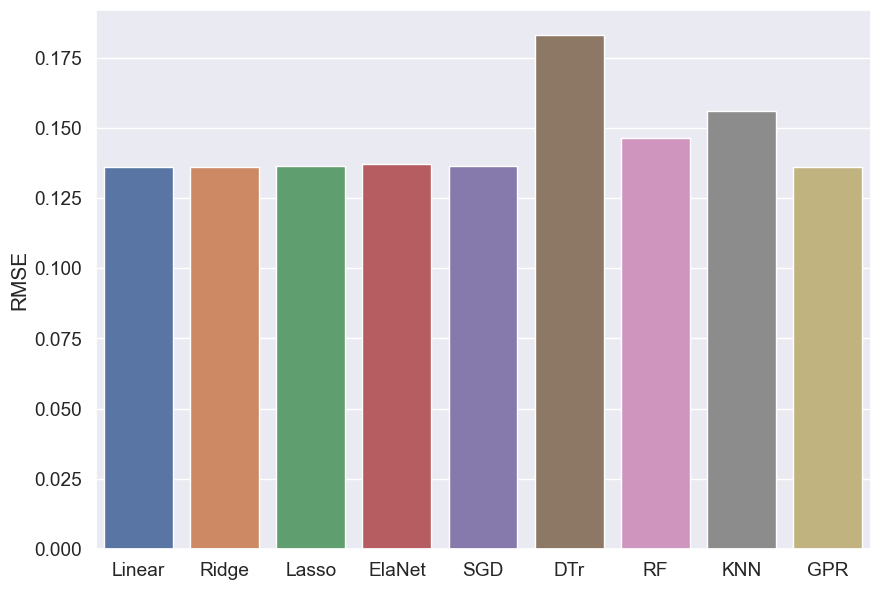

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('RMSE')
plt.show()

Correlation of model results

In [98]:
predictions = {'Linear': pred_linreg_all, 'Ridge': pred_ridge_all, 'Lasso': pred_lasso,
               'ElaNet': pred_enet, 'SGD': pred_sgd, 'DTr': pred_dtree, 'RF': pred_rf,
               'KNN': pred_knn, 'GPR': pred_gpr}
df_predictions = pd.DataFrame(data=predictions) 
df_predictions.corr()

Linear     Ridge     Lasso    ElaNet       SGD       DTr        RF  \
Linear  1.000000  0.999999  0.999809  0.999343  0.999780  0.937594  0.979560   
Ridge   0.999999  1.000000  0.999829  0.999379  0.999799  0.937557  0.979568   
Lasso   0.999809  0.999829  1.000000  0.999543  0.999738  0.937715  0.979870   
ElaNet  0.999343  0.999379  0.999543  1.000000  0.999706  0.936547  0.979243   
SGD     0.999780  0.999799  0.999738  0.999706  1.000000  0.936823  0.979339   
DTr     0.937594  0.937557  0.937715  0.936547  0.936823  1.000000  0.961995   
RF      0.979560  0.979568  0.979870  0.979243  0.979339  0.961995  1.000000   
KNN     0.964423  0.964513  0.964510  0.966557  0.966123  0.922761  0.962781   
GPR     1.000000  0.999999  0.999809  0.999343  0.999780  0.937594  0.979560   

             KNN       GPR  
Linear  0.964423  1.000000  
Ridge   0.964513  0.999999  
Lasso   0.964510  0.999809  
ElaNet  0.966557  0.999343  
SGD     0.966123  0.999780  
DTr     0.922761  0.937594  
RF      0.962781  0.979560  
KNN     1.000000  0.964422  
GPR     0.964422  1.000000

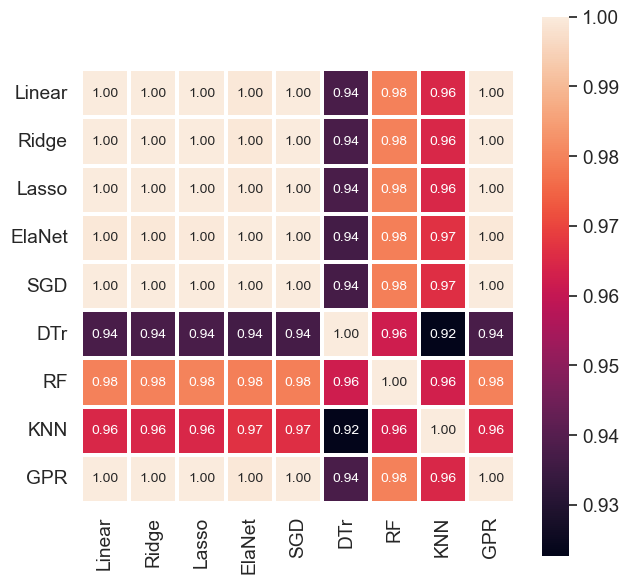

In [99]:
plt.figure(figsize=(7, 7))
sns.set(font_scale=1.25)
sns.heatmap(df_predictions.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=df_predictions.columns , xticklabels=df_predictions.columns
            )
plt.show()

For the first five models, the predictions show a very high correlation to each other (very close to 1.00).
Only for Random Forest and Decision Tree, the results are less correlated with the other Regressors.

mean of best models

In [100]:
sub_mean = pd.DataFrame()
sub_mean['Id'] = id_test
sub_mean['SalePrice'] = np.round( (pred_lasso + pred_enet + pred_rf + pred_sgd) / 4.0 ) 
sub_mean['SalePrice'] = sub_mean['SalePrice'].astype(float)
sub_mean.to_csv('mean.csv',index=False)

| ÌäπÏßï    | Skewness                                             | Kurtosis                                                                                    |
| ----- | ---------------------------------------------------- | ------------------------------------------------------------------------------------------- |
| Ï†ïÏùò    | ÌôïÎ•† Î∂ÑÌè¨Ïùò ÎπÑÎåÄÏπ≠ÏÑ±ÏùÑ Ï∏°Ï†ïÌïòÎäî ÏßÄÌëúÏûÖÎãàÎã§.                             | Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑ú Î∂ÑÌè¨ÏôÄ ÎπÑÍµêÌïòÏó¨ Íº¨Î¶¨Í∞Ä ÎëêÍªçÍ±∞ÎÇò ÏñáÏùÄÏßÄÎ•º Ï∏°Ï†ïÌïòÎäî ÏßÄÌëúÏûÖÎãàÎã§.                                                  |
| Í∞íÏùò Î≤îÏúÑ | \-0.5ÏóêÏÑú 0.5 ÏÇ¨Ïù¥Îäî ÎåÄÏπ≠ÏûÖÎãàÎã§.                               | Ï†ïÍ∑ú Î∂ÑÌè¨Ïùò Ï≤®ÎèÑÎäî 3ÏûÖÎãàÎã§. Ï≤®ÎèÑÍ∞Ä 3Î≥¥Îã§ ÏûëÏúºÎ©¥ ÌèâÌèâÌïú Î∂ÑÌè¨(platykurtic)ÎùºÍ≥† ÌïòÎ©∞, 3Î≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞Îäî Îæ∞Ï°±Ìïú Î∂ÑÌè¨(leptokurtic)ÎùºÍ≥† Ìï©ÎãàÎã§. |
| Í≥ÑÏÇ∞ Î∞©Î≤ï | Seaborn ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò skew() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ SkewnessÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏäµÎãàÎã§. | Seaborn ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò kurt() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ KurtosisÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.                                        |